# Sentiment Analysis of Flipkart Product Reviews
**Overview**
* This project builds a machine learning model to classify Flipkart customer reviews for the "YONEX MAVIS 350 Nylon Shuttle" as positive or negative, highlighting customer pain points to guide product improvements.

### Key Steps:
* **Objective**
* Classify reviews as positive or negative and analyze negative feedback to identify common product issues.

* **Dataset**
* 8,518 reviews with attributes such as Rating, Review Text, Up Votes, and Down Votes provide a rich basis for sentiment analysis.

### Data Preprocessing

* Clean and normalize text.
* Extract features using methods like TF-IDF, Word2Vec, and BERT.
### Modeling
* Train various models and evaluate them using F1-Score to select the best-performing model.

### Deployment
* Develop a Flask or Streamlit app for real-time review sentiment classification and deploy it on an AWS EC2 instance.

### Workflow:
* **Data Analysis:** Identify patterns and dissatisfaction factors.
* **Text Embedding & Model Training:** Convert text to vectors, train models, and evaluate performance.
* **App Deployment:** Deploy the best model in a user-friendly app for real-time use.

## Unzipping and Extracting Data from a ZIP File
* This code defines a function unzip to extract the contents of a ZIP file to a specified directory. 
* It uses the zipfile library to open the ZIP file and extract all its files to the given output path. 
* After running the function with the provided file paths, it prints a confirmation message indicating the extraction was successful.

In [1]:
import zipfile
import pandas as pd
import os

def unzip(zip_file_path, output_dir_path):
    with zipfile.ZipFile(zip_file_path, "r") as zip:
        zip.extractall(output_dir_path)
    print("Data uncompressed successfully...")
    print()

zip_file_path = r"C:\Users\mdimr\Downloads\Flipkart  Sentiment Analysis\reviews_data_dump (1).zip"
output_dir_path = r"C:\Users\mdimr\Downloads\Flipkart  Sentiment Analysis\reviews_extracted_files"

unzip(zip_file_path,output_dir_path)

Data uncompressed successfully...



## Import Libraries
* **pandas:** Used for data manipulation and analysis (working with dataframes).
* **wordcloud:** For creating word clouds to visualize text data.
* **re:** Regular expression operations, useful for text cleaning and pattern matching.
* **nltk:** The Natural Language Toolkit, a powerful library for text processing, including tokenization, stemming, lemmatization, and stop word removal.
* **matplotlib & seaborn:** Libraries for data visualization. matplotlib is used for basic plotting, while seaborn offers advanced visualizations.
* **CountVectorizer & TfidfVectorizer:** Convert text data into numerical features using the Count and TF-IDF methods, respectively.
* **Word2Vec (gensim):** A model to convert words into vectors for more advanced text analysis.

In [1]:
# import required libraries
import pandas as pd
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

## 3. Loading the Dataset
* This line loads the dataset from the CSV file specified by the path variable using pandas read_csv function.
* The data is stored in a DataFrame (df), which is a 2D table-like structure where rows represent individual records, and columns represent attributes of those records.

In [2]:
path = r"C:\Users\mdimr\Downloads\Flipkart  Sentiment Analysis\reviews_extracted_files\reviews_badminton\data.csv"

In [3]:
# load dataframe
df = pd.read_csv(path)

In [4]:
df.shape

(8518, 8)

In [5]:
# columns
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [6]:
# head 
df.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0       NaN   
4                          NaN     147.0        24.0  Apr 2016   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks packed in ...        1  
3  Quite O. K. , but nowadays  the quality of the...        3  
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1

In [7]:
df.dtypes

Reviewer Name       object
Review Title        object
Place of Review     object
Up Votes           float64
Down Votes         float64
Month               object
Review text         object
Ratings              int64
dtype: object

### Checking for Missing Values

In [8]:
# null values
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

### Converting Data Types for Analysis

In [9]:
# Import necessary libraries
import pandas as pd



# Convert 'Month' to datetime format (assuming it's a month name or date format)
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')  # 'errors=coerce' handles any invalid parsing by setting NaT

# Cast 'Ratings' to object type
df['Ratings'] = df['Ratings'].astype(object)


In [10]:
df.dtypes

Reviewer Name              object
Review Title               object
Place of Review            object
Up Votes                  float64
Down Votes                float64
Month              datetime64[ns]
Review text                object
Ratings                    object
dtype: object

In [11]:
# null values
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

### Handling Missing Data by Imputation

In [12]:
# Import necessary libraries
import pandas as pd

# Assume df is your DataFrame

# Fill numerical columns with forward fill (ffill)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].ffill()

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object', 'datetime64']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
df.isna().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

### Removing Rows with  3 is considered a neutral Rating 

In [14]:
# remove the values with rating 3
df=df[df['Ratings']!=3]

### Mapping Numerical Ratings to Sentiment Labels



In [15]:
# Create a mapping dictionary for sentiment labels
sentiment_mapping = {
    1: 'Negative',
    2: 'Negative',
    4: 'Positive',
    5: 'Positive'
}

# Convert numerical values in score to sentiment labels
df['Sentiment'] =df['Ratings'].map(sentiment_mapping)

In [16]:
df.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
4               ASHIK P A                Over priced   
5             Baji Sankar      Mind-blowing purchase   

               Place of Review  Up Votes  Down Votes      Month  \
0   Certified Buyer, Chirakkal     889.0        64.0 2021-02-01   
1   Certified Buyer, Hyderabad     109.0         6.0 2021-02-01   
2  Certified Buyer, Dharmapuri      42.0         3.0 2021-04-01   
4   Certified Buyer, Bengaluru     147.0        24.0 2016-04-01   
5   Certified Buyer, Hyderabad     173.0        45.0 2018-10-01   

                                         Review text Ratings Sentiment  
0  Nice product, good quality, but price is now r...       4  Positive  
1  They didn't supplied Yonex Mavis 350. Outside ...       1  Negative  
2  Worst product. Damaged shuttlecocks packed in ...       1  Negative  
4  Over pricedJust â?¹620 ..from retailer.I didn'...       1  Negative  
5  Good quality product. Delivered on time.READ MORE       5  Positive

In [17]:
# Import necessary libraries
import pandas as pd

# Assume df is your DataFrame

# Fill numerical columns with forward fill (ffill)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].ffill()

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object', 'datetime64']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

### 1. Sentiment Distribution

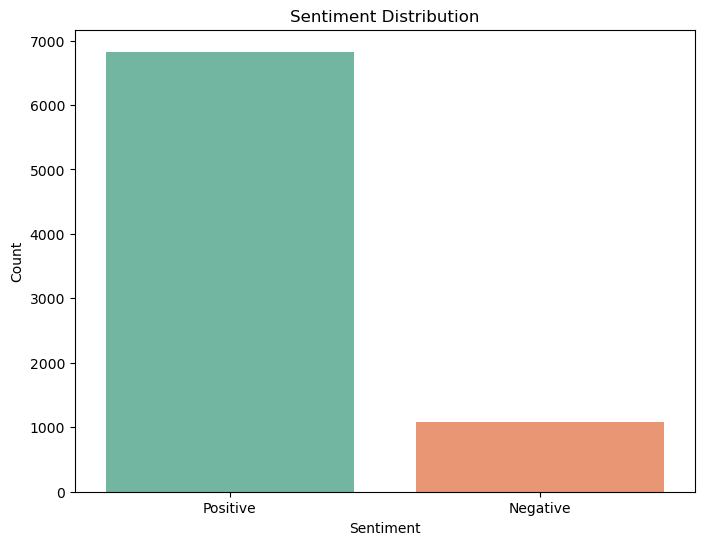

In [19]:
### 1. Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### 2. Ratings Distribution by Sentiment

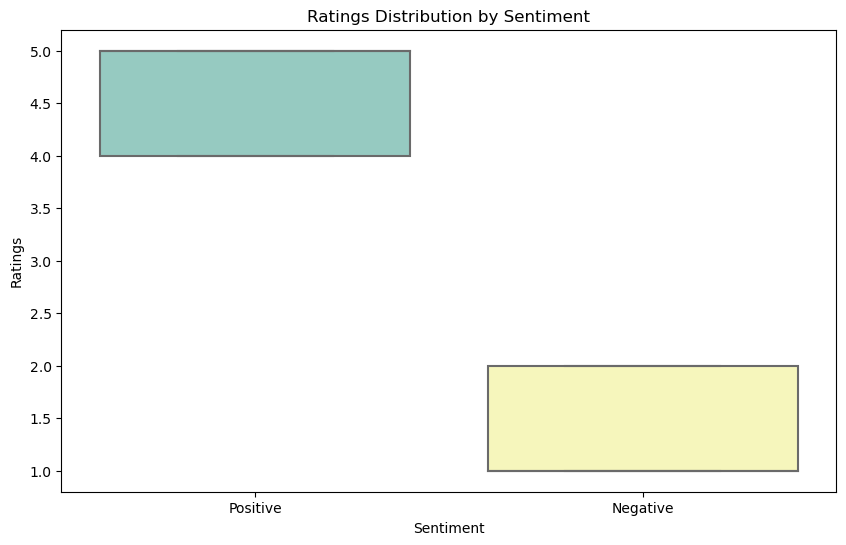

In [20]:
### 2. Ratings Distribution by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Ratings', data=df, palette='Set3')
plt.title('Ratings Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Ratings')
plt.show()

### 3. Location-Based Sentiment Analysis

In [21]:
### 3. Location-Based Sentiment Analysis
location_sentiment = df.groupby('Place of Review')['Sentiment'].value_counts().unstack().fillna(0)
top_locations = location_sentiment.sum(axis=1).sort_values(ascending=False).head(10)
location_sentiment = location_sentiment.loc[top_locations.index]

<Figure size 1200x800 with 0 Axes>

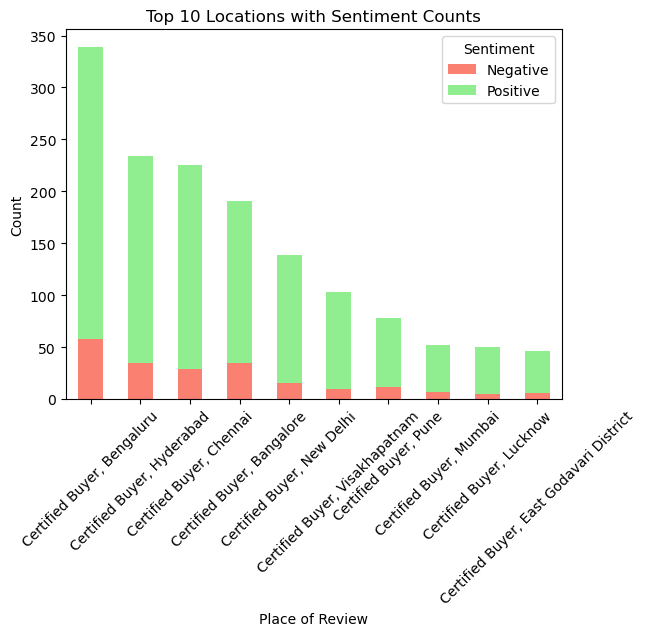

In [22]:
plt.figure(figsize=(12, 8))
location_sentiment.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])
plt.title('Top 10 Locations with Sentiment Counts')
plt.xlabel('Place of Review')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

### 4. Monthly Sentiment Trend

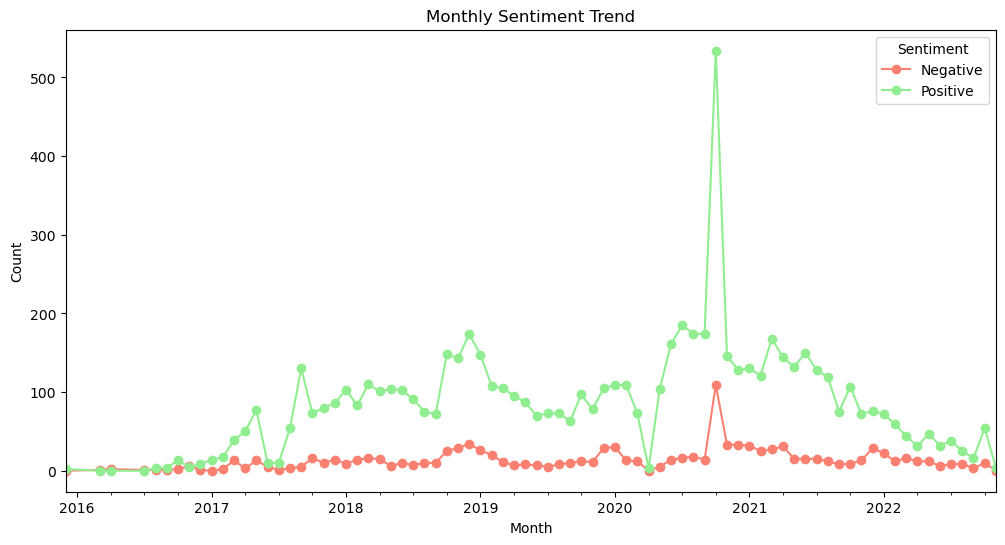

In [23]:
### 4. Monthly Sentiment Trend
monthly_sentiment = df.groupby(df['Month'].dt.to_period('M'))['Sentiment'].value_counts().unstack().fillna(0)
monthly_sentiment.plot(kind='line', marker='o', figsize=(12, 6), color=['salmon', 'lightgreen'])
plt.title('Monthly Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### 5. Up Votes and Down Votes by Sentiment

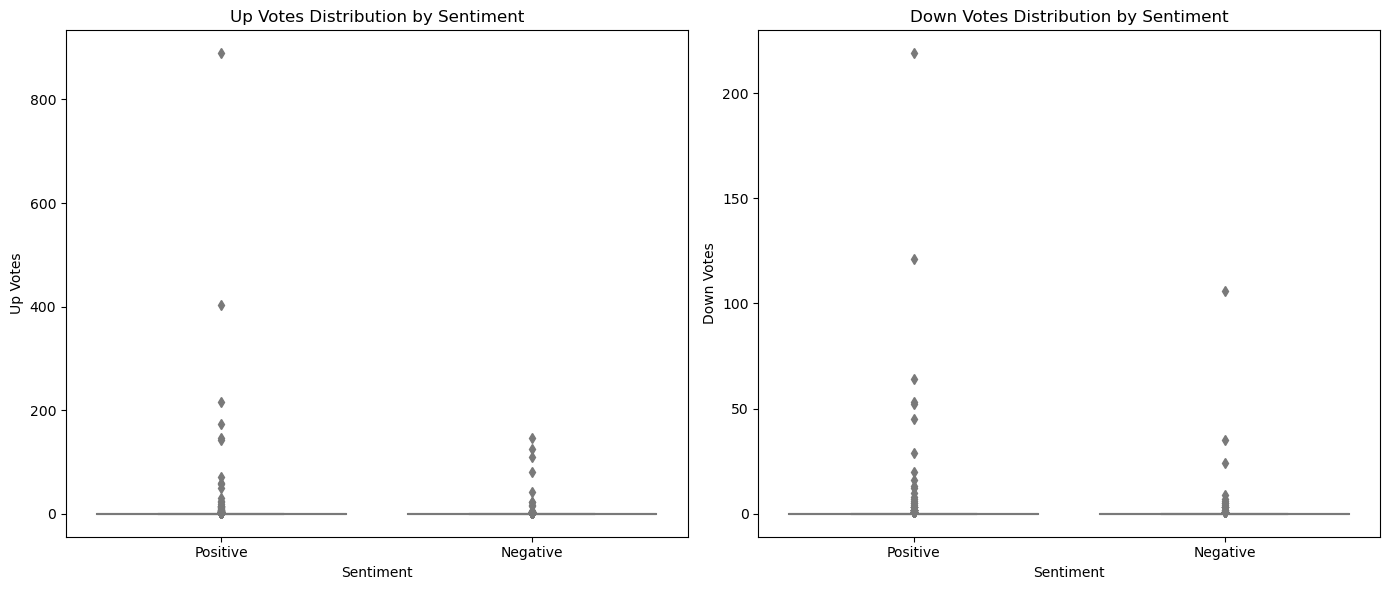

In [24]:
### 5. Up Votes and Down Votes by Sentiment
plt.figure(figsize=(14, 6))

# Up Votes
plt.subplot(1, 2, 1)
sns.boxplot(x='Sentiment', y='Up Votes', data=df, palette='coolwarm')
plt.title('Up Votes Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Up Votes')

# Down Votes
plt.subplot(1, 2, 2)
sns.boxplot(x='Sentiment', y='Down Votes', data=df, palette='coolwarm')
plt.title('Down Votes Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Down Votes')

plt.tight_layout()
plt.show()

### 7. Common Words in Positive and Negative Reviews

In [25]:
### 7. Common Words in Positive and Negative Reviews
positive_words = Counter(" ".join(df[df['Sentiment'] == 'Positive']['Review text'].astype(str)).split()).most_common(10)
negative_words = Counter(" ".join(df[df['Sentiment'] == 'Negative']['Review text'].astype(str)).split()).most_common(10)

print("Top 10 words in Positive Reviews:", positive_words)
print("Top 10 words in Negative Reviews:", negative_words)

Top 10 words in Positive Reviews: [('MORE', 6826), ('Good', 891), ('good', 837), ('productREAD', 775), ('for', 692), ('is', 665), ('GoodREAD', 652), ('and', 646), ('product', 522), ('the', 491)]
Top 10 words in Negative Reviews: [('MORE', 1077), ('not', 277), ('the', 263), ('is', 255), ('of', 182), ('very', 158), ('quality', 145), ('shuttle', 143), ('product', 135), ('and', 123)]


### creating a dataframe for positive sentiments

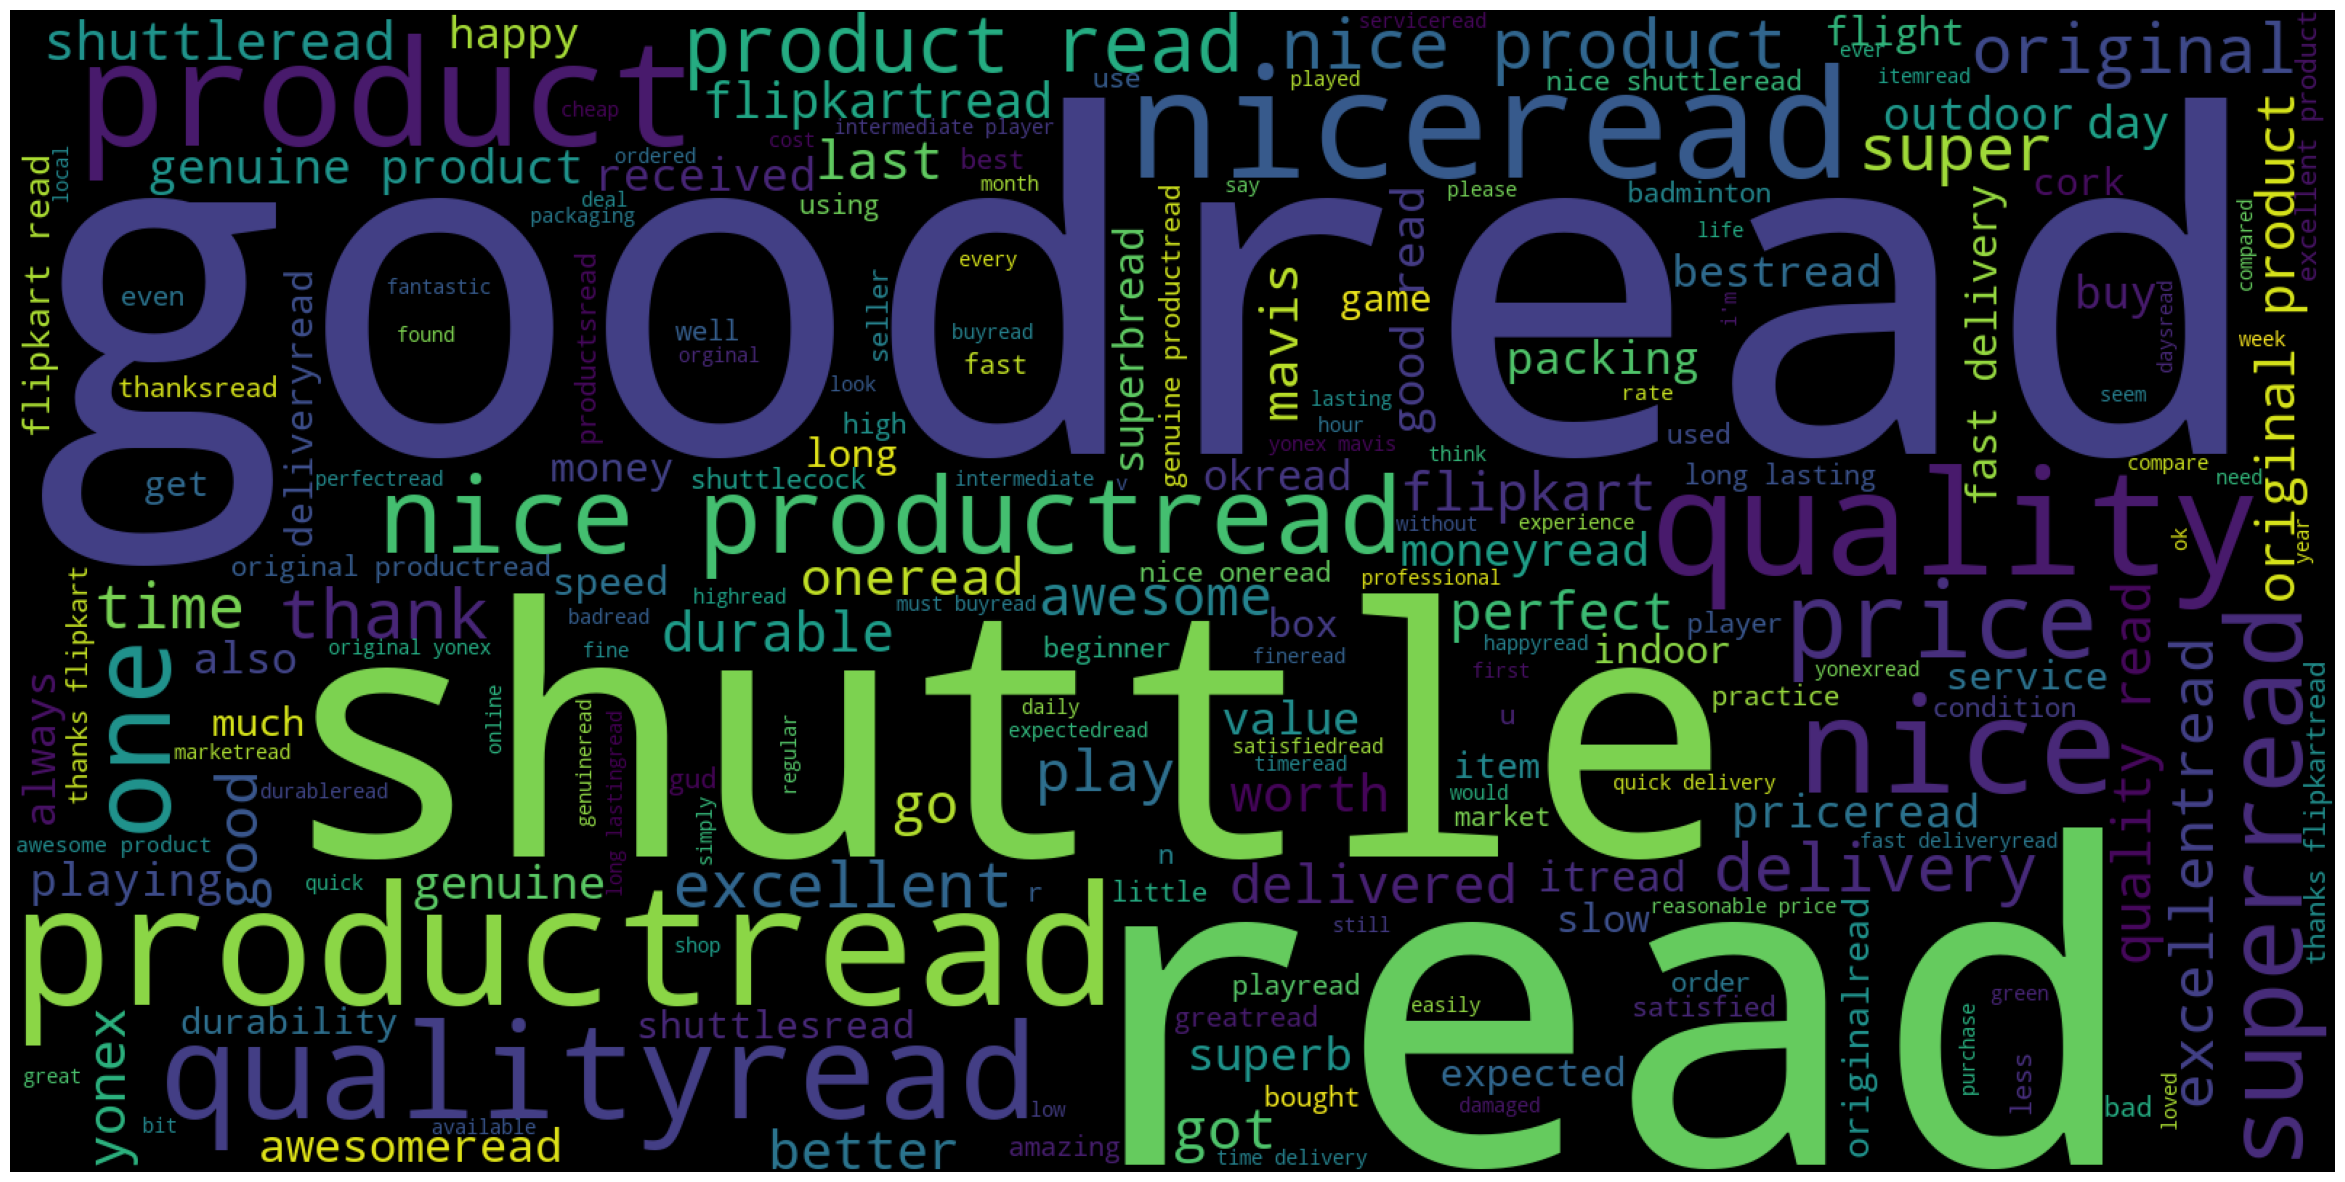

In [26]:
#creating a dataframe for positive sentiments
df_positive=df.loc[df["Sentiment"]=="Positive",:]

#joining the positive sentences 
words=" ".join(df_positive["Review text"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","really","good","best","br"]]) 
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

### creating a dataframe for negative sentiments

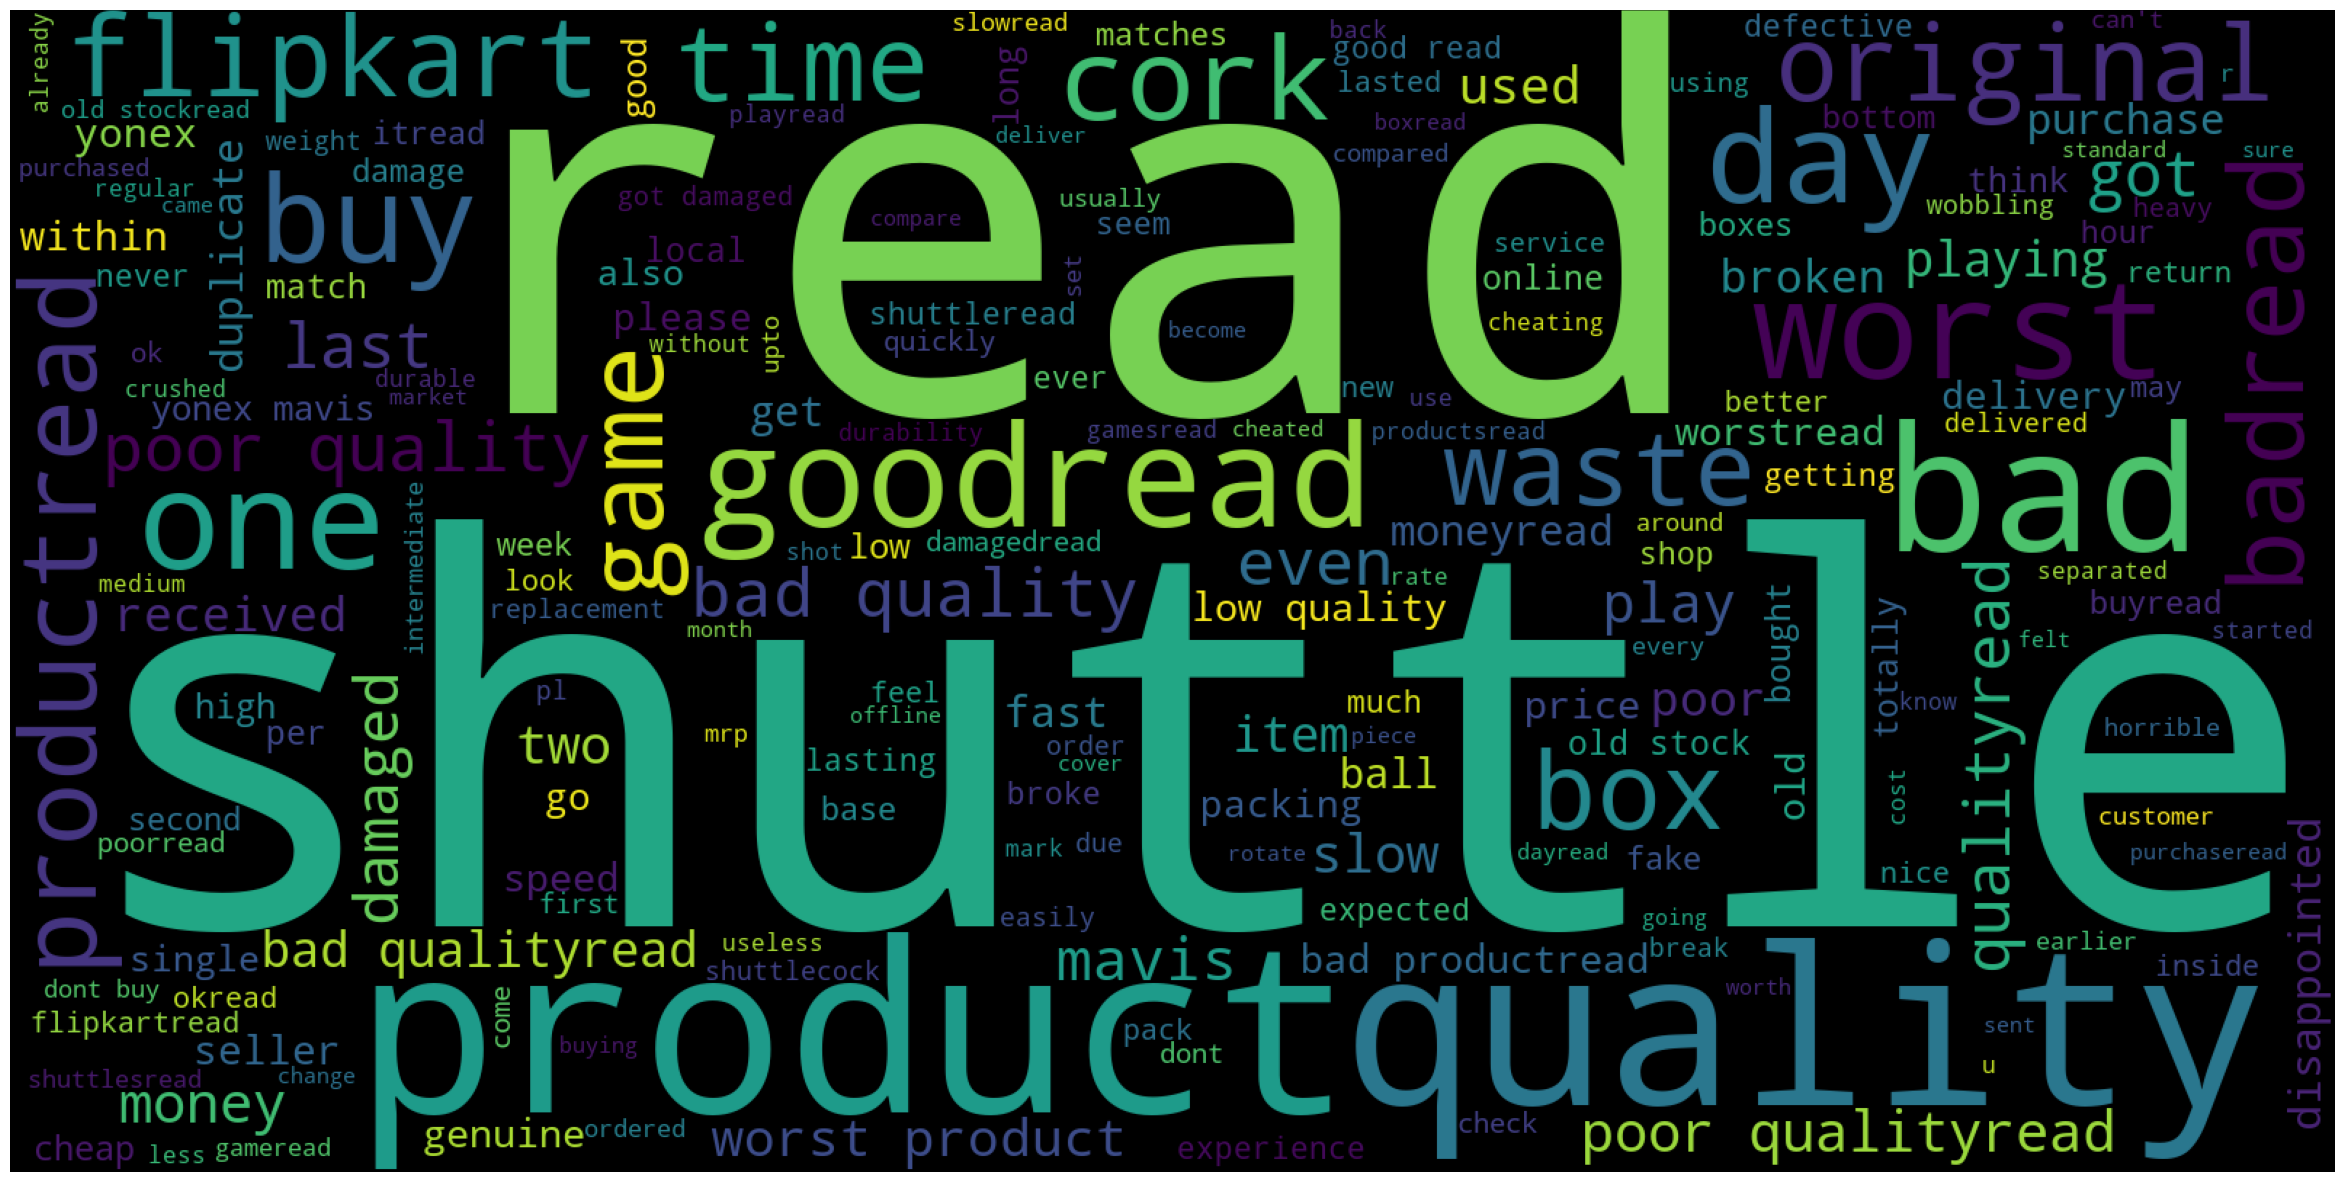

In [27]:
#creating a dataframe for negative sentiments
df_negative=df.loc[df["Sentiment"]=="Negative",:]

#joining the positive sentences 
words=" ".join(df_negative["Review text"]).lower()

#cleaned words
cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","really","good","best","br"]]) 
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

## Text Cleaning and Tokenization Functions
* **Cleaning Function (clean):** This function processes raw text to clean and preprocess it by removing noise, tokenizing, and applying techniques like lemmatization and stop-word removal

In [28]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from textblob import TextBlob

def clean(doc):
    
    # Ensure doc is a string
    if isinstance(doc, str):
        # HTML Parsing and Cleanup
        soup = BeautifulSoup(doc, "html.parser")
        doc = soup.get_text()
    else:
        raise ValueError("Input should be a string containing HTML content.")

    # Removing Special characters
    regex = '[^a-zA-Z\s]'
    doc = re.sub(regex, '', doc)

    # Lowercase text
    text = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'br','one','product','will','flavor','love','taste'}
    stop_words = stop_words.union(custom_stop_words)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join and return
    return " ".join(lemmatized_tokens)
def tokenizer(doc):
    # Tokenization
    return nltk.word_tokenize(doc)

### Using tqdm for Progress Bars with Pandas

In [29]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()
df['clean_ReviewText'] = df['Review text'].progress_apply(lambda x : clean(x))
df[['Review text','clean_ReviewText']]

  0%|                                                                               | 2/7903 [00:03<4:14:17,  1.93s/it]C:\Users\mdimr\AppData\Local\Temp\ipykernel_19784\157131368.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc, "html.parser")
100%|█████████████████████████████████████████████████████████████████████████████| 7903/7903 [00:13<00:00, 577.52it/s]


Review text  \
0     Nice product, good quality, but price is now r...   
1     They didn't supplied Yonex Mavis 350. Outside ...   
2     Worst product. Damaged shuttlecocks packed in ...   
4     Over pricedJust â?¹620 ..from retailer.I didn'...   
5     Good quality product. Delivered on time.READ MORE   
...                                                 ...   
8513                                      GoodREAD MORE   
8514                                      GoodREAD MORE   
8515                                      GoodREAD MORE   
8516                                      GoodREAD MORE   
8517                                      GoodREAD MORE   

                                       clean_ReviewText  
0     nice good quality price rising bad sign afford...  
1     didnt supplied yonex mavis outside cover yonex...  
2     worst damaged shuttlecock packed new box origi...  
4     pricedjust retaileri didnt understand wat adva...  
5                       good quality delivered timeread  
...                                                 ...  
8513                                           goodread  
8514                                           goodread  
8515                                           goodread  
8516                                           goodread  
8517                                           goodread  

[7903 rows x 2 columns]

## Splitting Input and Output Variables

In [30]:
# splitting input and output variables
X=df[['clean_ReviewText']]
y=df['Sentiment']


## Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

# Step 1: Split into 80% train and 20% temporary (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=45)

# Step 2: Split the temporary set into 50% test and 50% validation (which is 10% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)




# BOW

### Feature Extraction using CountVectorizer
* In this code, the CountVectorizer from sklearn is used to convert text data into a matrix of token counts.
* This is the most basic form of feature extraction for text, where each word (or token) in the document is counted and transformed into a numerical feature.

In [23]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectoriezer
bow_vect = CountVectorizer(token_pattern=None,
                           tokenizer=tokenizer,
                           ngram_range=(1, 1), 
                           lowercase=False, 
                           preprocessor=clean, 
                           stop_words=None)

# use it to extract features from training data
%time X_train_transformed = bow_vect.fit_transform(X_train['clean_ReviewText'])

print()
print(f"Shape of X_train_transformed (# of docs, # of unique vocabulary): {X_train_transformed.shape}")
print(f"Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): {type(X_train_transformed)}")
print(f"Vocabulary learned: {bow_vect.get_feature_names_out()[:10]}")

CPU times: total: 5 s
Wall time: 10.8 s

Shape of X_train_transformed (# of docs, # of unique vocabulary): (6322, 2934)
Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary learned: ['aajao' 'aapke' 'able' 'aboutdelieveryflipkart' 'aboutread' 'absence'
 'absolute' 'absolutely' 'abt' 'acceptable']


###  Transforming Validation and Test Data

In [30]:
X_val_transformed = bow_vect.transform(X_val['clean_ReviewText'])
print(f'Shape of X_val_transformed: {X_val_transformed.shape}') 

Shape of X_val_transformed: (790, 2934)


In [31]:
X_test_transformed = bow_vect.transform(X_test['clean_ReviewText'])
print(f'Shape of X_test_transformed: {X_test_transformed.shape}') 

Shape of X_test_transformed: (791, 2934)


In [32]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define your custom tokenizer and clean function
def tokenizer(text):
    # Your custom tokenizer logic here (e.g., splitting text into tokens)
    return text.split()

def clean(text):
    # Custom cleaning function (e.g., remove HTML, special characters, etc.)
    # You can add your own text cleaning logic here, such as lowercasing, removing stopwords, etc.
    import re
    from bs4 import BeautifulSoup
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english')) - {'not', 'no'}
    
    # Clean the text
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML
    text = re.sub("[^a-zA-Z]", " ", text).lower()  # Remove non-alphabetic characters and convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

# Assuming X_train['clean_ReviewText'] is your preprocessed text data
# Instantiate the CountVectorizer
bow_vect = CountVectorizer(
    token_pattern=None, 
    tokenizer=tokenizer, 
    ngram_range=(1, 1), 
    lowercase=False, 
    preprocessor=clean, 
    stop_words=None
)

# Transform the training data
X_train_transformed = bow_vect.fit_transform(X_train['clean_ReviewText'])

# Assuming y_train is your target variable
# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

import pickle

# Save the logistic regression model
with open(r"C:\Users\mdimr\Downloads\Flipkart Sentiment Analysis\App\models\logreg_bow_model1.pkl", 'wb') as model_file:
    pickle.dump(logreg, model_file)

# Save the bag-of-words vectorizer
with open(r"C:\Users\mdimr\Downloads\Flipkart Sentiment Analysis\App\models\bow_vectorizer1.pkl", 'wb') as vect_file:
    pickle.dump(bow_vect, vect_file)

## Importing Machine Learning Models and Metrics

In [32]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

## Model Dictionary Setup for Classification

In [33]:
# Updated models dictionary (still using GaussianNB instead of MultinomialNB)
models = {
    'Naviebayes':MultinomialNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Dictionary to store results
results = {}

## Training and Evaluation of Models

In [34]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining Using BOW Vectorizer.... {model_name}...")
    
    # Train the model and record training time
    start_time = time.time()
    model.fit( X_train_transformed, y_train)
    train_time = time.time() - start_time
    
    # Predict on the validation set and record prediction time
    start_time = time.time()
    y_val_pred = model.predict(X_val_transformed)
    val_time = time.time() - start_time
    
    # Compute validation F1 score
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Predict on the test set and record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test_transformed)
    test_time = time.time() - start_time
    
    # Compute test F1 score
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[model_name] = {
        'Train Time': train_time,
        'Val Prediction Time': val_time,
        'Val F1 Score': val_f1,
        'Test Prediction Time': test_time,
        'Test F1 Score': test_f1
    }
    
    # Print results for the model
    print(f"{model_name} - Train Time: {train_time:.4f}s, Val F1 Score: {val_f1:.4f}, Test F1 Score: {test_f1:.4f}")



Training Using BOW Vectorizer.... Naviebayes...
Naviebayes - Train Time: 0.0259s, Val F1 Score: 0.9217, Test F1 Score: 0.9135

Training Using BOW Vectorizer.... DecisionTree...
DecisionTree - Train Time: 0.6916s, Val F1 Score: 0.9183, Test F1 Score: 0.9068

Training Using BOW Vectorizer.... KNeighbors...
KNeighbors - Train Time: 0.0172s, Val F1 Score: 0.9039, Test F1 Score: 0.8945

Training Using BOW Vectorizer.... RandomForest...
RandomForest - Train Time: 9.4783s, Val F1 Score: 0.9265, Test F1 Score: 0.9131

Training Using BOW Vectorizer.... AdaBoost...


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Train Time: 1.4623s, Val F1 Score: 0.9167, Test F1 Score: 0.9121

Training Using BOW Vectorizer.... LogisticRegression...
LogisticRegression - Train Time: 0.1167s, Val F1 Score: 0.9261, Test F1 Score: 0.9157


### Encoding Categorical Labels into Numerical Labels

In [85]:
# Encode categorical labels as numerical
from sklearn.preprocessing import LabelEncoder




# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

### Training and Evaluating XGBoost Classifier

In [86]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

%time xgb_classifier.fit(X_train_transformed, y_train_encoded)

# Predicting on unseen data
%time y_val_pred = xgb_classifier.predict(X_val_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_val_encoded, y_val_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Train Score: {f1:.4f}")

CPU times: total: 625 ms
Wall time: 209 ms
CPU times: total: 0 ns
Wall time: 0 ns


Model's Train Score: 0.9126


### Predicting on Test Data and Model Evaluation

In [87]:
# Predicting on unseen data
%time y_test_pred = xgb_classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Test Score: {f1:.4f}")

CPU times: total: 0 ns
Wall time: 3.93 ms


Model's Test Score: 0.9015


## Model Performance Visualizations

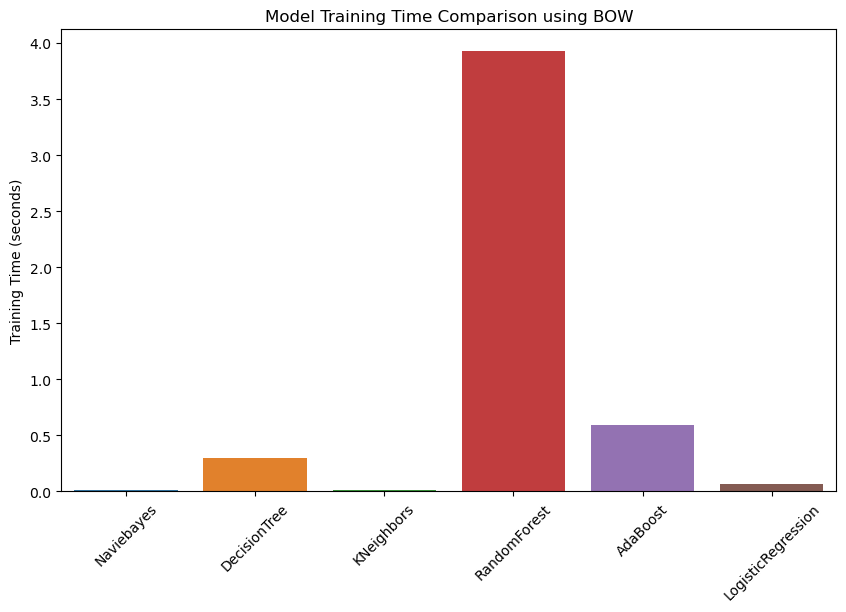

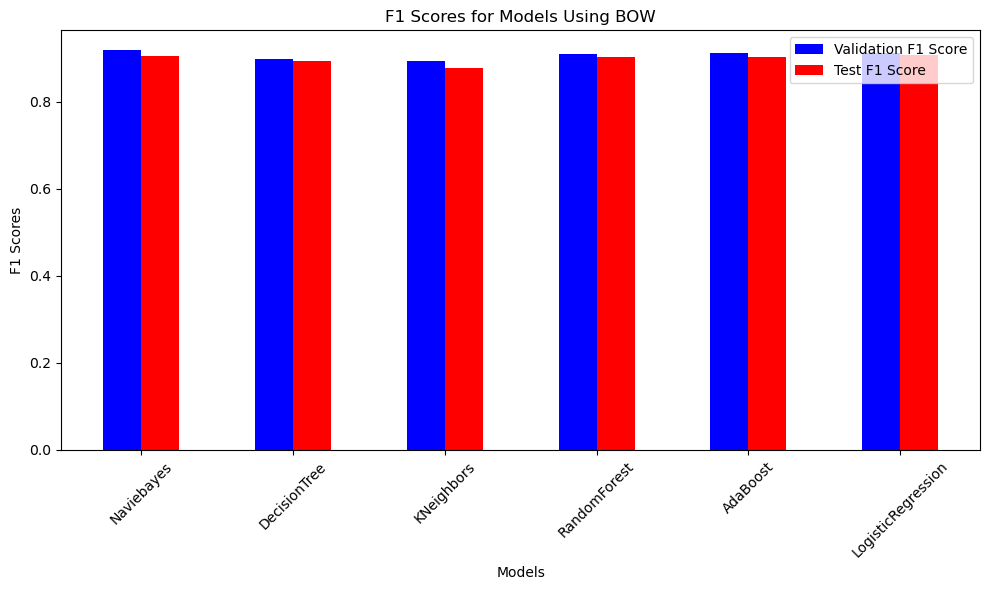

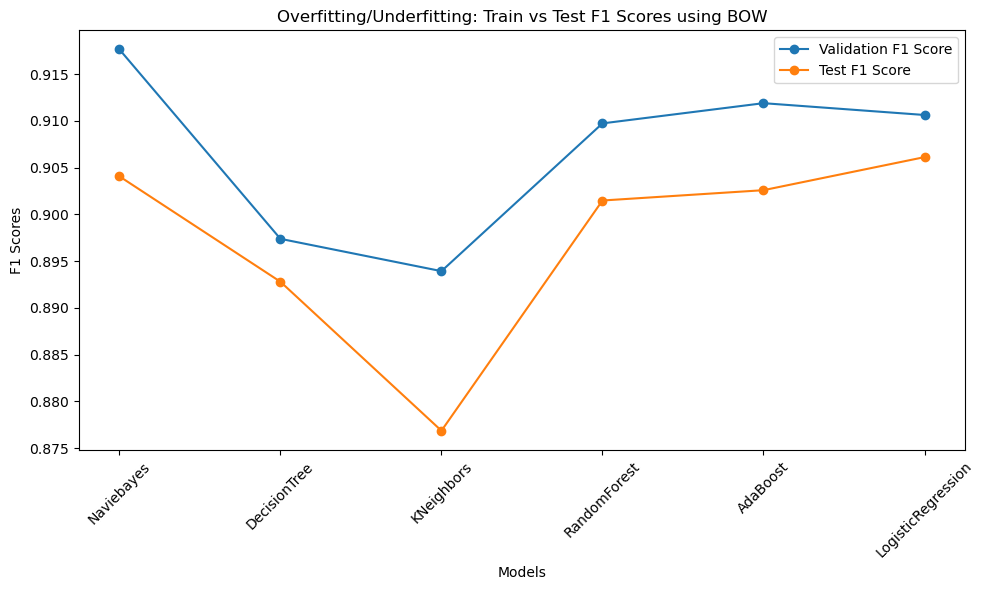

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting results for plotting
models_list = list(results.keys())
train_times = [results[model]['Train Time'] for model in models_list]
val_f1_scores = [results[model]['Val F1 Score'] for model in models_list]
test_f1_scores = [results[model]['Test F1 Score'] for model in models_list]

# Plot: Training Time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models_list, y=train_times)
plt.title('Model Training Time Comparison using BOW')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# Plot: F1 Scores Comparison (Training, Validation, Test)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = range(len(models_list))

# Plot training F1 scores
ax.bar(index, val_f1_scores, bar_width, label='Validation F1 Score', color='b')
ax.bar([i + bar_width for i in index], test_f1_scores, bar_width, label='Test F1 Score', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores for Models Using BOW')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models_list, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Plot: Overfitting / Underfitting (Train vs Test F1 Scores)
plt.figure(figsize=(10, 6))
plt.plot(models_list, val_f1_scores, label='Validation F1 Score', marker='o')
plt.plot(models_list, test_f1_scores, label='Test F1 Score', marker='o')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Overfitting/Underfitting: Train vs Test F1 Scores using BOW')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Using TF-IDF Vectorizer

### 1. TF-IDF Vectorization , Fit and Transform the Training Data

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(token_pattern=None,
                             tokenizer = tokenizer,
                             ngram_range=(1, 1), 
                             lowercase=False, 
                             preprocessor=clean, 
                             stop_words=None)

%time tfidf_Xtrain = tfidf_vect.fit_transform(X_train['clean_ReviewText'])

print(f"Shape of output (# of docs, # of unique vocabulary): {tfidf_Xtrain.shape}")

print(f"Type of output (i.e. Compressed Sparse Row (CSR) format): {type(tfidf_Xtrain)}")

CPU times: total: 2.06 s
Wall time: 3.68 s
Shape of output (# of docs, # of unique vocabulary): (6814, 3127)
Type of output (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>


In [72]:
%time X_val_transformed = tfidf_vect.transform(X_val['clean_ReviewText'])
print(f'Shape of X_val_transformed: {X_val_transformed.shape}') 

CPU times: total: 266 ms
Wall time: 470 ms
Shape of X_val_transformed: (852, 3127)


In [73]:
%time X_test_transformed = tfidf_vect.transform(X_test['clean_ReviewText'])
print(f'Shape of X_test_transformed: {X_test_transformed.shape}') 

CPU times: total: 141 ms
Wall time: 472 ms
Shape of X_test_transformed: (852, 3127)


### Updated Models Dictionary and Results Storage

In [74]:
# Updated models dictionary (still using GaussianNB instead of MultinomialNB)
models = {
    'Naviebayes':MultinomialNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Dictionary to store results
results = {}

### Training and Evaluation of Models Using TF-IDF Vectorizer

In [75]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining Using Tfidf Vectorizer.... {model_name}...")
    
    # Train the model and record training time
    start_time = time.time()
    model.fit(tfidf_Xtrain, y_train)
    train_time = time.time() - start_time
    
    # Predict on the validation set and record prediction time
    start_time = time.time()
    y_val_pred = model.predict(X_val_transformed)
    val_time = time.time() - start_time
    
    # Compute validation F1 score
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Predict on the test set and record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test_transformed)
    test_time = time.time() - start_time
    
    # Compute test F1 score
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[model_name] = {
        'Train Time': train_time,
        'Val Prediction Time': val_time,
        'Val F1 Score': val_f1,
        'Test Prediction Time': test_time,
        'Test F1 Score': test_f1
    }
    
    # Print results for the model
    print(f"{model_name} - Train Time: {train_time:.4f}s, Val F1 Score: {val_f1:.4f}, Test F1 Score: {test_f1:.4f}")



Training Using Tfidf Vectorizer.... Naviebayes...
Naviebayes - Train Time: 0.0116s, Val F1 Score: 0.8854, Test F1 Score: 0.8687

Training Using Tfidf Vectorizer.... DecisionTree...
DecisionTree - Train Time: 0.4505s, Val F1 Score: 0.9055, Test F1 Score: 0.8895

Training Using Tfidf Vectorizer.... KNeighbors...
KNeighbors - Train Time: 0.0000s, Val F1 Score: 0.9061, Test F1 Score: 0.8888

Training Using Tfidf Vectorizer.... RandomForest...
RandomForest - Train Time: 3.4696s, Val F1 Score: 0.9119, Test F1 Score: 0.8990

Training Using Tfidf Vectorizer.... AdaBoost...


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Train Time: 0.6177s, Val F1 Score: 0.9119, Test F1 Score: 0.8985

Training Using Tfidf Vectorizer.... LogisticRegression...
LogisticRegression - Train Time: 0.0635s, Val F1 Score: 0.9091, Test F1 Score: 0.9003


### Training and Evaluation of XGBoost Classifier Using TF-IDF Vectorizer

In [76]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

%time xgb_classifier.fit(tfidf_Xtrain, y_train_encoded)

# Predicting on unseen data
%time y_val_pred = xgb_classifier.predict(X_val_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_val_encoded, y_val_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Train Score: {f1:.4f}")

CPU times: total: 1.36 s
Wall time: 449 ms
CPU times: total: 0 ns
Wall time: 0 ns


Model's Train Score: 0.9153


### Predicting on Test Data and Model Evaluation

In [77]:
# Predicting on unseen data
%time y_test_pred = xgb_classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Test Score: {f1:.4f}")

CPU times: total: 31.2 ms
Wall time: 4.29 ms


Model's Test Score: 0.8970


### Model Performance Visualization: Training Time and F1 Scores
* This code generates various plots to visually compare the performance of different models:

* **Training Time Comparison:** A bar plot showing the time taken by each model to train using the TF-IDF vectorizer.
* **F1 Score Comparison (Validation & Test):** A grouped bar plot comparing the F1 scores for validation and test sets for each model.
* **Overfitting/Underfitting Analysis:** A line plot comparing validation and test F1 scores to assess potential overfitting or underfitting in the models.

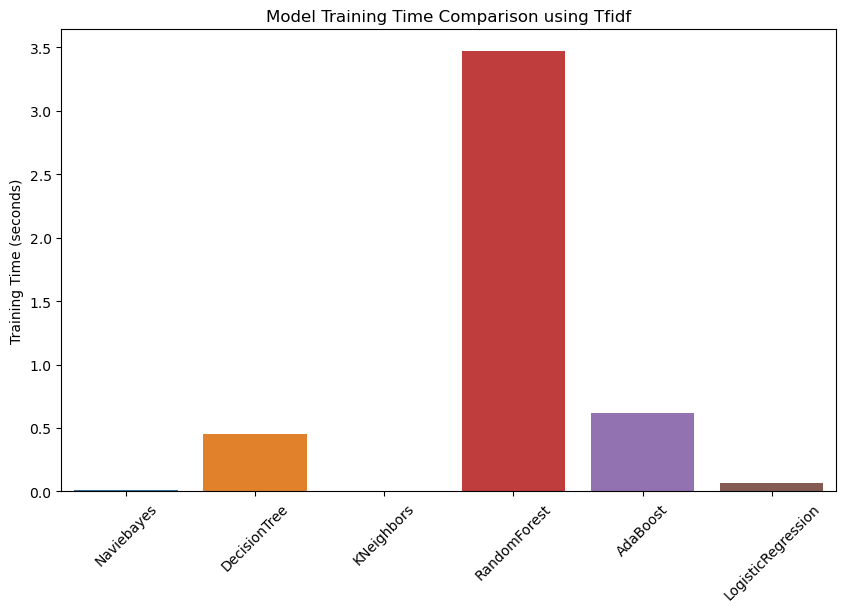

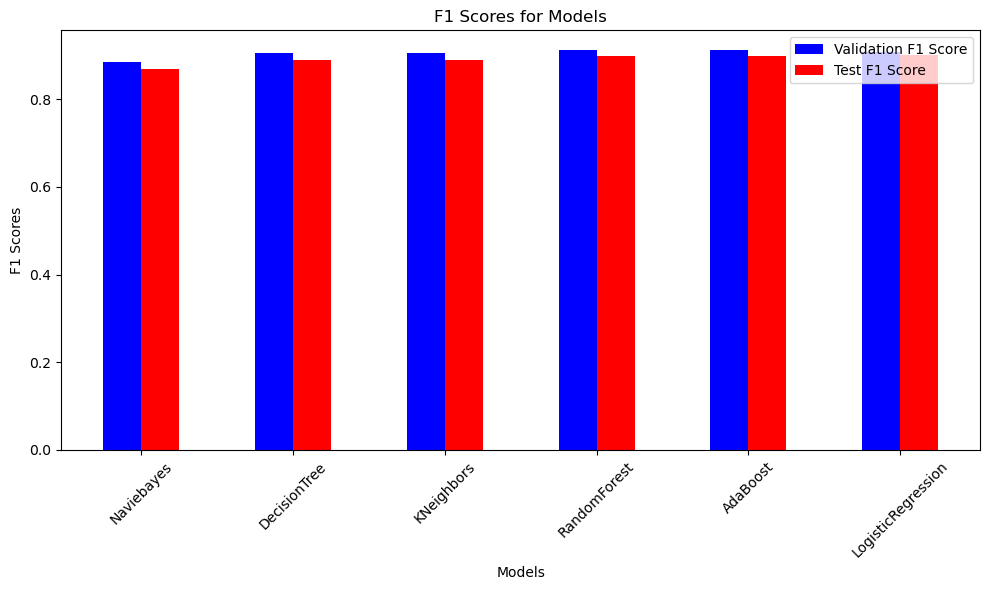

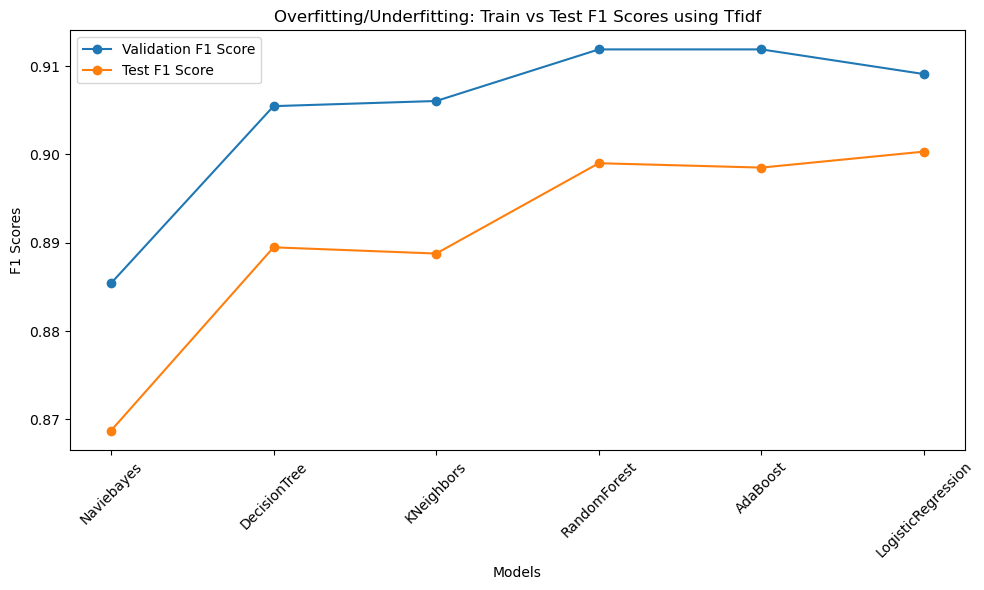

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting results for plotting
models_list = list(results.keys())
train_times = [results[model]['Train Time'] for model in models_list]
val_f1_scores = [results[model]['Val F1 Score'] for model in models_list]
test_f1_scores = [results[model]['Test F1 Score'] for model in models_list]

# Plot: Training Time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models_list, y=train_times)
plt.title('Model Training Time Comparison using Tfidf')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# Plot: F1 Scores Comparison (Training, Validation, Test)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = range(len(models_list))

# Plot training F1 scores
ax.bar(index, val_f1_scores, bar_width, label='Validation F1 Score', color='b')
ax.bar([i + bar_width for i in index], test_f1_scores, bar_width, label='Test F1 Score', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores for Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models_list, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Plot: Overfitting / Underfitting (Train vs Test F1 Scores)
plt.figure(figsize=(10, 6))
plt.plot(models_list, val_f1_scores, label='Validation F1 Score', marker='o')
plt.plot(models_list, test_f1_scores, label='Test F1 Score', marker='o')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Overfitting/Underfitting: Train vs Test F1 Scores using Tfidf')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Word2vec

## Word2Vec Model Setup for Word Embeddings

In [59]:
# Install gensim if not already installed
# !pip install gensim

from gensim.models import Word2Vec
import numpy as np


### Training a Word2Vec Model on Tokenized Data

In [60]:
# Tokenize the text data for Word2Vec training
tokenized_train_data = [tokenizer(doc) for doc in X_train['clean_ReviewText']]

# Train Word2Vec model on tokenized data
word2vec_model = Word2Vec(sentences=tokenized_train_data, vector_size=300, window=5, min_count=1, workers=4)


### Converting Text to Word2Vec Vectors
* The document_vector function converts each document into a vector by averaging the word vectors of valid words in the document. 
* The training data is transformed using this function, creating the X_train_Word2vec array.
* The shape of the transformed data is printed, showing the number of documents and the vector dimensions (300).

In [61]:
def document_vector(doc, model):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv]
    # If there are valid words, compute the mean of word vectors
    if len(doc) > 0:
        return np.mean(model.wv[doc], axis=0)
    else:
        # Return a zero vector if no valid words are found
        return np.zeros(model.vector_size)

# Transform the training data
X_train_Word2vec = np.array([document_vector(tokenizer(doc), word2vec_model) for doc in X_train['clean_ReviewText']])

print(f"Shape of transformed training data: {X_train_Word2vec.shape}")


Shape of transformed training data: (6814, 300)


### Transforming Validation and Test Data Using Word2Vec

In [62]:
# Transform the validation and test data
X_val_Word2vec = np.array([document_vector(tokenizer(doc), word2vec_model) for doc in X_val['clean_ReviewText']])
X_test_Word2vec = np.array([document_vector(tokenizer(doc), word2vec_model) for doc in X_test['clean_ReviewText']])

print(f"Shape of transformed validation data: {X_val_Word2vec.shape}")
print(f"Shape of transformed test data: {X_test_Word2vec.shape}")


Shape of transformed validation data: (852, 300)
Shape of transformed test data: (852, 300)


### Model Initialization and Setup
* This section initializes various machine learning models, including Gaussian Naive Bayes, Decision Tree, K-Nearest Neighbors, Random Forest, AdaBoost, and Logistic Regression. 
* A dictionary results is created to store evaluation metrics such as training time and model performance for each model.

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


# Updated models dictionary (still using GaussianNB instead of MultinomialNB)
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Dictionary to store results
results = {}


### Model Training and Evaluation using Word2Vec
* In this section, the provided models are trained using the Word2Vec vectorized features. 
* For each model, the training time, prediction time, and F1 scores (both validation and test) are computed and stored. 
* The results for each model, including training time and F1 scores, are printed for comparison.


In [66]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining using Word2vec Vectorizer... {model_name}...")
    
    # Train the model and record training time
    start_time = time.time()
    model.fit(X_train_Word2vec, y_train)
    train_time = time.time() - start_time
    
    # Predict on the validation set and record prediction time
    start_time = time.time()
    y_val_pred = model.predict(X_val_Word2vec)
    val_time = time.time() - start_time
    
    # Compute validation F1 score
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Predict on the test set and record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test_Word2vec)
    test_time = time.time() - start_time
    
    # Compute test F1 score
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[model_name] = {
        'Train Time': train_time,
        'Val Prediction Time': val_time,
        'Val F1 Score': val_f1,
        'Test Prediction Time': test_time,
        'Test F1 Score': test_f1
    }
    
    # Print results for the model
    print(f"{model_name} - Train Time: {train_time:.4f}s, Val F1 Score: {val_f1:.4f}, Test F1 Score: {test_f1:.4f}")



Training using Word2vec Vectorizer... GaussianNB...
GaussianNB - Train Time: 0.0258s, Val F1 Score: 0.6148, Test F1 Score: 0.5915

Training using Word2vec Vectorizer... DecisionTree...
DecisionTree - Train Time: 1.9306s, Val F1 Score: 0.8484, Test F1 Score: 0.8356

Training using Word2vec Vectorizer... KNeighbors...
KNeighbors - Train Time: 0.0052s, Val F1 Score: 0.8684, Test F1 Score: 0.8445

Training using Word2vec Vectorizer... RandomForest...
RandomForest - Train Time: 7.9779s, Val F1 Score: 0.8828, Test F1 Score: 0.8517

Training using Word2vec Vectorizer... AdaBoost...


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Train Time: 11.1554s, Val F1 Score: 0.8741, Test F1 Score: 0.8564

Training using Word2vec Vectorizer... LogisticRegression...
LogisticRegression - Train Time: 0.0671s, Val F1 Score: 0.8428, Test F1 Score: 0.8024


### XGBoost Model Training and Evaluation

In [68]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

%time xgb_classifier.fit(X_train_Word2vec, y_train_encoded)

# Predicting on unseen data
%time y_val_pred = xgb_classifier.predict(X_val_Word2vec)

# Model Evaluation
print()
print()
f1 = f1_score(y_val_encoded, y_val_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Train Score: {f1:.4f}")

CPU times: total: 6.77 s
Wall time: 2.31 s
CPU times: total: 0 ns
Wall time: 5.53 ms


Model's Train Score: 0.8853


### XGBoost Model Test Prediction and Evaluation


In [69]:
# Predicting on unseen data
%time y_test_pred = xgb_classifier.predict(X_test_Word2vec)

# Model Evaluation
print()
print()
f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Test Score: {f1:.4f}")

CPU times: total: 0 ns
Wall time: 5.2 ms


Model's Test Score: 0.8813


### Model Performance Visualization: Training Time and F1 Scores
* This code generates various plots to visually compare the performance of different models:

* **Training Time Comparison:** A bar plot showing the time taken by each model to train using the Word2vec vectorizer.
* **F1 Score Comparison (Validation & Test):** A grouped bar plot comparing the F1 scores for validation and test sets for each model.
* **Overfitting/Underfitting Analysis:** A line plot comparing validation and test F1 scores to assess potential overfitting or underfitting in the models.

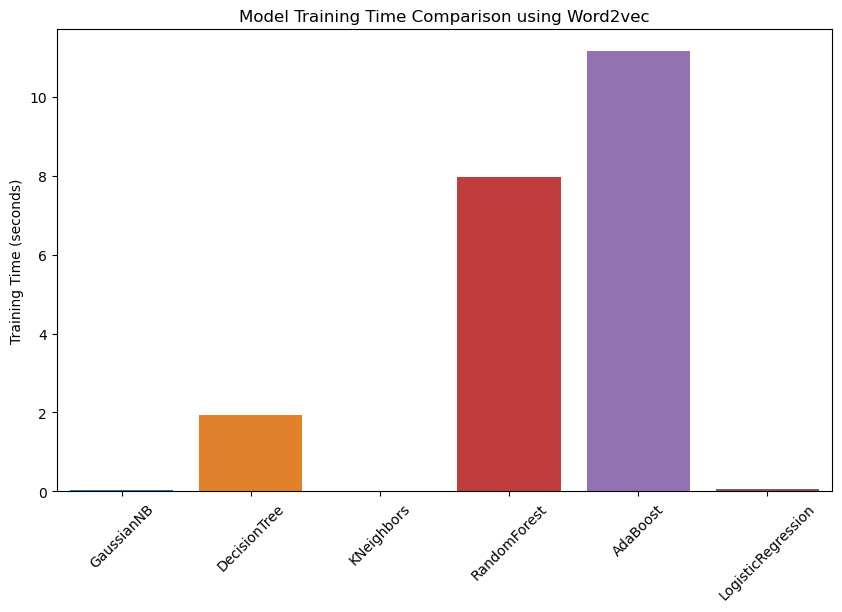

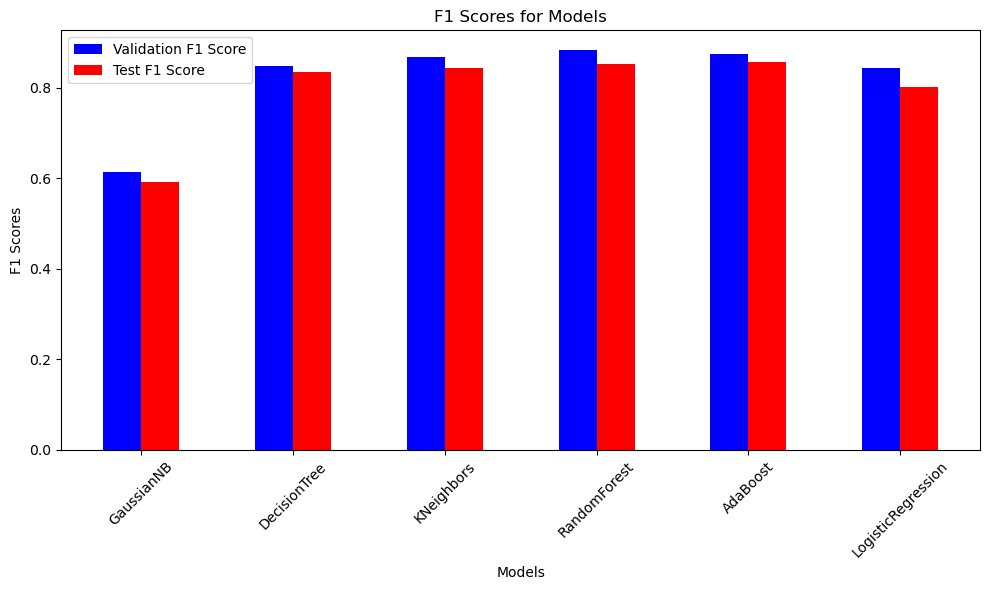

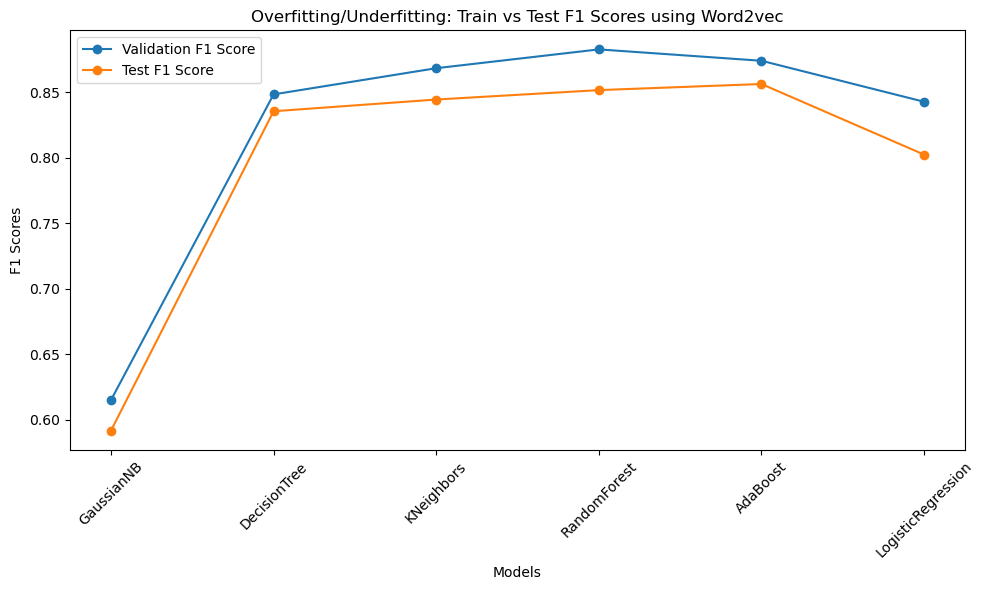

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting results for plotting
models_list = list(results.keys())
train_times = [results[model]['Train Time'] for model in models_list]
val_f1_scores = [results[model]['Val F1 Score'] for model in models_list]
test_f1_scores = [results[model]['Test F1 Score'] for model in models_list]

# Plot: Training Time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models_list, y=train_times)
plt.title('Model Training Time Comparison using Word2vec')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# Plot: F1 Scores Comparison (Training, Validation, Test)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = range(len(models_list))

# Plot training F1 scores
ax.bar(index, val_f1_scores, bar_width, label='Validation F1 Score', color='b')
ax.bar([i + bar_width for i in index], test_f1_scores, bar_width, label='Test F1 Score', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores for Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models_list, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Plot: Overfitting / Underfitting (Train vs Test F1 Scores)
plt.figure(figsize=(10, 6))
plt.plot(models_list, val_f1_scores, label='Validation F1 Score', marker='o')
plt.plot(models_list, test_f1_scores, label='Test F1 Score', marker='o')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Overfitting/Underfitting: Train vs Test F1 Scores using Word2vec')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# GloVe

## Unzipping GloVe Word Embeddings

In [95]:
import zipfile

zip_file = r"C:\Users\mdimr\Downloads\glove.6B (1).zip"
extract_folder = r"C:\Users\mdimr\Downloads\glove.6B"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


### Loading GloVe Word Embeddings (100D)

In [96]:
import numpy as np

def load_glove_vectors(file_path):
    glove_vectors = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            glove_vectors[word] = vector
    return glove_vectors

# Load 100-dimensional vectors
glove_file = r"C:\Users\mdimr\Downloads\glove.6B\glove.6B.100d.txt"
glove_vectors = load_glove_vectors(glove_file)

print(f"Loaded {len(glove_vectors)} words.")


Loaded 400000 words.


### Document Vector Creation Using GloVe Embeddings

In [97]:
import numpy as np
def document_vector(tokens, glove_vectors, vector_dim=100):
    """
    Given a list of tokens, this function will create a document vector
    by averaging the word vectors from the GloVe dictionary.
    If a word is not found in the GloVe dictionary, it will be represented by a zero vector.
    """
    word_vectors = [glove_vectors.get(word, np.zeros(vector_dim)) for word in tokens]
    if len(word_vectors) == 0:
        return np.zeros(vector_dim)
    return np.mean(word_vectors, axis=0)


### Generating Document Vectors Using GloVe for Training, Validation, and Test Data

In [98]:
# Apply GloVe vectors to the training data
X_train_GloVe = np.array([document_vector(tokenizer(doc), glove_vectors) for doc in X_train['clean_ReviewText']])

print(f"Shape of transformed training data: {X_train_GloVe.shape}")

# Apply GloVe vectors to the validation and test data
X_val_GloVe = np.array([document_vector(tokenizer(doc), glove_vectors) for doc in X_val['clean_ReviewText']])
X_test_GloVe = np.array([document_vector(tokenizer(doc), glove_vectors) for doc in X_test['clean_ReviewText']])

print(f"Shape of transformed validation data: {X_val_GloVe.shape}")
print(f"Shape of transformed test data: {X_test_GloVe.shape}")


Shape of transformed training data: (6814, 100)
Shape of transformed validation data: (852, 100)
Shape of transformed test data: (852, 100)


### Training and Evaluating Models with GloVe Word Embeddings
* This code trains multiple classification models using GloVe word vectors and evaluates them using F1 scores on both validation and test data. 
* The performance is stored and printed for each model, along with the time taken for training and prediction tasks.

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

# Updated models dictionary
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Dictionary to store results
results = {}

# Assuming you have already prepared the GloVe vectors and transformed the text data
# Using GloVe vectors to transform the training, validation, and test data
X_train_GloVe = np.array([document_vector(tokenizer(doc), glove_vectors) for doc in X_train['clean_ReviewText']])
X_val_GloVe = np.array([document_vector(tokenizer(doc), glove_vectors) for doc in X_val['clean_ReviewText']])
X_test_GloVe = np.array([document_vector(tokenizer(doc), glove_vectors) for doc in X_test['clean_ReviewText']])

# Train and evaluate each model using GloVe vectors
for model_name, model in models.items():
    print(f"\nTraining using GloVe Vectorizer... {model_name}...")
    
    # Train the model and record training time
    start_time = time.time()
    model.fit(X_train_GloVe, y_train)
    train_time = time.time() - start_time
    
    # Predict on the validation set and record prediction time
    start_time = time.time()
    y_val_pred = model.predict(X_val_GloVe)
    val_time = time.time() - start_time
    
    # Compute validation F1 score
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Predict on the test set and record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test_GloVe)
    test_time = time.time() - start_time
    
    # Compute test F1 score
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[model_name] = {
        'Train Time': train_time,
        'Val Prediction Time': val_time,
        'Val F1 Score': val_f1,
        'Test Prediction Time': test_time,
        'Test F1 Score': test_f1
    }
    
    # Print results for the model
    print(f"{model_name} - Train Time: {train_time:.4f}s, Val F1 Score: {val_f1:.4f}, Test F1 Score: {test_f1:.4f}")

# You can also print the summary of results at the end
print("\nSummary of Results:")
for model_name, result in results.items():
    print(f"{model_name}: {result}")



Training using GloVe Vectorizer... GaussianNB...
GaussianNB - Train Time: 0.0190s, Val F1 Score: 0.7940, Test F1 Score: 0.8053

Training using GloVe Vectorizer... DecisionTree...
DecisionTree - Train Time: 0.4528s, Val F1 Score: 0.8817, Test F1 Score: 0.8445

Training using GloVe Vectorizer... KNeighbors...
KNeighbors - Train Time: 0.0055s, Val F1 Score: 0.8799, Test F1 Score: 0.8561

Training using GloVe Vectorizer... RandomForest...
RandomForest - Train Time: 3.7424s, Val F1 Score: 0.8971, Test F1 Score: 0.8716

Training using GloVe Vectorizer... AdaBoost...


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Train Time: 3.3273s, Val F1 Score: 0.8747, Test F1 Score: 0.8828

Training using GloVe Vectorizer... LogisticRegression...
LogisticRegression - Train Time: 0.0475s, Val F1 Score: 0.9096, Test F1 Score: 0.8917

Summary of Results:
GaussianNB: {'Train Time': 0.01895618438720703, 'Val Prediction Time': 0.0020017623901367188, 'Val F1 Score': 0.7939893626953968, 'Test Prediction Time': 0.001070261001586914, 'Test F1 Score': 0.8053482117781158}
DecisionTree: {'Train Time': 0.452838659286499, 'Val Prediction Time': 0.0010383129119873047, 'Val F1 Score': 0.8817448576350186, 'Test Prediction Time': 0.0010027885437011719, 'Test F1 Score': 0.8444641548548005}
KNeighbors: {'Train Time': 0.0055353641510009766, 'Val Prediction Time': 0.3837864398956299, 'Val F1 Score': 0.8799394834480025, 'Test Prediction Time': 0.031162738800048828, 'Test F1 Score': 0.8560647058463468}
RandomForest: {'Train Time': 3.7423975467681885, 'Val Prediction Time': 0.015619993209838867, 'Val F1 Score': 0.89712892

### Training and Evaluating XGBoost with GloVe Vectors


In [100]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

%time xgb_classifier.fit(X_train_GloVe, y_train_encoded)

# Predicting on unseen data
%time y_val_pred = xgb_classifier.predict(X_val_GloVe)

# Model Evaluation
print()
print()
f1 = f1_score(y_val_encoded, y_val_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Train Score: {f1:.4f}")

CPU times: total: 1.81 s
Wall time: 657 ms
CPU times: total: 0 ns
Wall time: 0 ns


Model's Train Score: 0.9013


### Predicting and Evaluating XGBoost on Test Data

In [101]:
# Predicting on unseen data
%time y_test_pred = xgb_classifier.predict(X_test_GloVe)

# Model Evaluation
print()
print()
f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Test Score: {f1:.4f}")

CPU times: total: 15.6 ms
Wall time: 7.08 ms


Model's Test Score: 0.8880


### Visualizing Model Performance with GloVe Embeddings
* This code generates several plots to visualize the performance of models using GloVe embeddings:

* **Training Time Comparison:** A bar chart that shows the training times for different models.
* **F1 Score Comparison (Validation and Test):** A bar chart comparing the F1 scores on validation and test sets for each model.
* **Overfitting/Underfitting Plot:** A line plot showing the F1 scores on the validation and test sets to highlight potential overfitting or underfitting across different models.

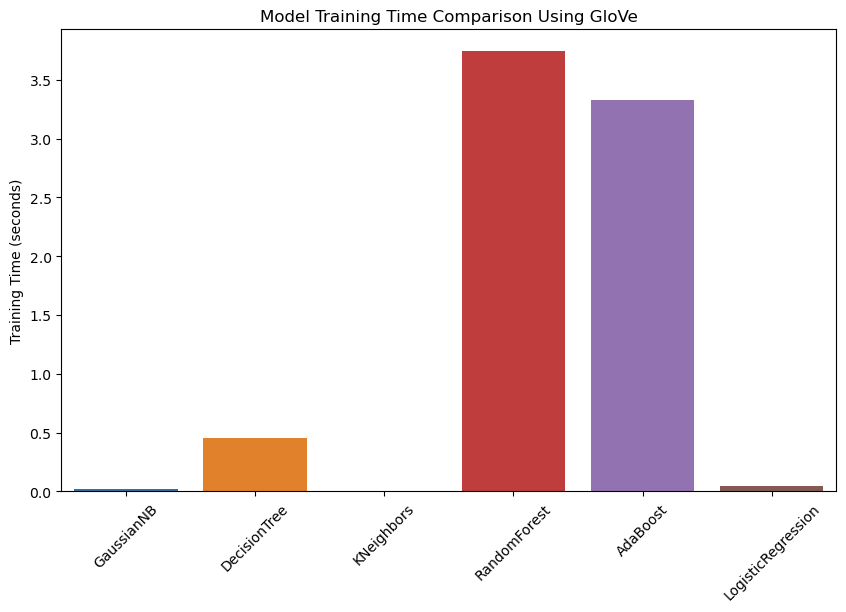

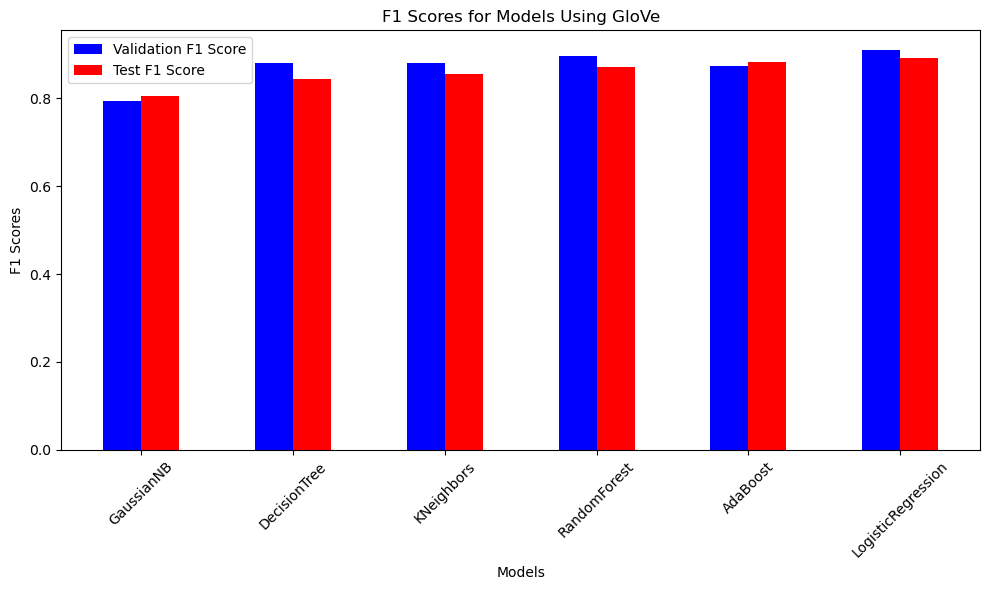

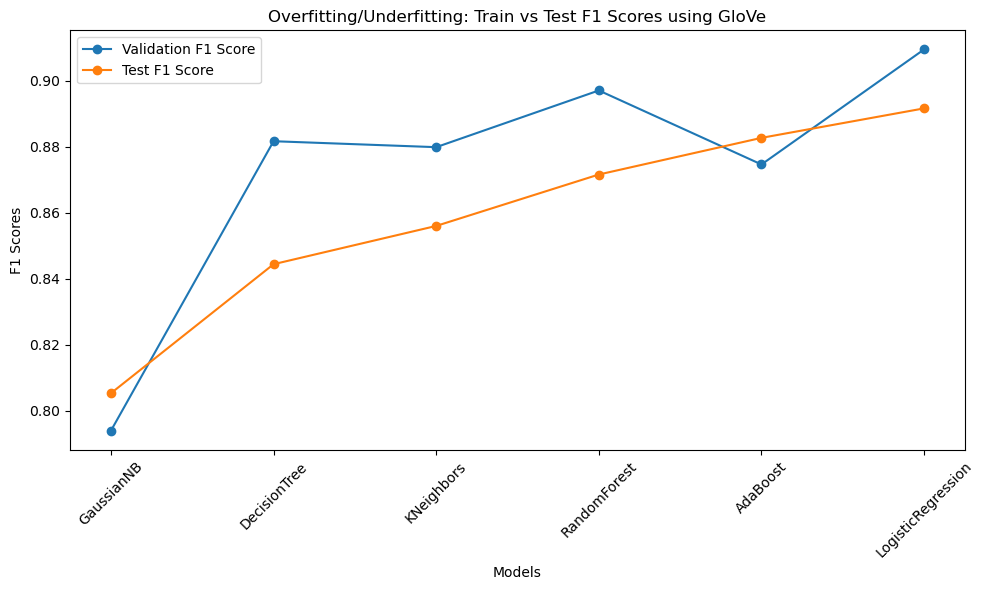

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting results for plotting
models_list = list(results.keys())
train_times = [results[model]['Train Time'] for model in models_list]
val_f1_scores = [results[model]['Val F1 Score'] for model in models_list]
test_f1_scores = [results[model]['Test F1 Score'] for model in models_list]

# Plot: Training Time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models_list, y=train_times)
plt.title('Model Training Time Comparison Using GloVe')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# Plot: F1 Scores Comparison (Training, Validation, Test)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = range(len(models_list))

# Plot training F1 scores
ax.bar(index, val_f1_scores, bar_width, label='Validation F1 Score', color='b')
ax.bar([i + bar_width for i in index], test_f1_scores, bar_width, label='Test F1 Score', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores for Models Using GloVe')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models_list, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Plot: Overfitting / Underfitting (Train vs Test F1 Scores)
plt.figure(figsize=(10, 6))
plt.plot(models_list, val_f1_scores, label='Validation F1 Score', marker='o')
plt.plot(models_list, test_f1_scores, label='Test F1 Score', marker='o')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Overfitting/Underfitting: Train vs Test F1 Scores using GloVe')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Bert

In [114]:
!pip install transformers torch



Defaulting to user installation because normal site-packages is not writeable


### Loading Pre-trained BERT Tokenizer and Model

In [35]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # num_labels=2 for binary sentiment analysis


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Getting BERT Embeddings for a Document

In [36]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # or you can use 'bert-large-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Function to get BERT embeddings for a single document
def get_bert_embeddings(text, tokenizer, model):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    # Get the model outputs (last_hidden_state and pooler_output)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # We will use the mean of the token embeddings as the document embedding
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    
    return embeddings



### Transforming Text Data Using BERT Embeddings

In [23]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
# Initialize BERT tokenizer and model (assuming you are using a pre-trained model like BERT base)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text, tokenizer, model):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    # Get the model outputs (last_hidden_state and pooler_output)
    with torch.no_grad():
        outputs = model(**inputs)
        
    # We will use the mean of the token embeddings as the document embedding
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    return embeddings

# Transform the training, validation, and test data using BERT embeddings
X_train_bert = np.array([get_bert_embeddings(doc, tokenizer, bert_model) for doc in X_train['clean_ReviewText']])
X_val_bert = np.array([get_bert_embeddings(doc, tokenizer, bert_model) for doc in X_val['clean_ReviewText']])
X_test_bert = np.array([get_bert_embeddings(doc, tokenizer, bert_model) for doc in X_test['clean_ReviewText']])

print(f"Shape of transformed training data: {X_train_bert.shape}")
print(f"Shape of transformed validation data: {X_val_bert.shape}")
print(f"Shape of transformed testing data: {X_test_bert.shape}")


Shape of transformed training data: (6322, 768)
Shape of transformed validation data: (790, 768)
Shape of transformed testing data: (791, 768)


* This code trains and evaluates several models (Naive Bayes, Decision Tree, KNN, Random Forest, AdaBoost, Logistic Regression) using BERT embeddings as features. For each model:

* **Training:** Models are trained using BERT embeddings from the training data.
* **Evaluation:** Models are tested on the validation and test sets, with F1 scores computed.
* **Metrics:** Training time, prediction time, and F1 scores (validation and test) are stored and printed for each model.

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

# Updated models dictionary
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Dictionary to store results
results = {}

# Train and evaluate each model using BERT vectors
for model_name, model in models.items():
    print(f"\nTraining using BERT embeddings... {model_name}...")
    
    # Train the model and record training time
    start_time = time.time()
    model.fit(X_train_bert, y_train)
    train_time = time.time() - start_time
    
    # Predict on the validation set and record prediction time
    start_time = time.time()
    y_val_pred = model.predict(X_val_bert)
    val_time = time.time() - start_time
    
    # Compute validation F1 score
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Predict on the test set and record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test_bert)
    test_time = time.time() - start_time
    
    # Compute test F1 score
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[model_name] = {
        'Train Time': train_time,
        'Val Prediction Time': val_time,
        'Val F1 Score': val_f1,
        'Test Prediction Time': test_time,
        'Test F1 Score': test_f1
    }
    
    # Print results for the model
    print(f"{model_name} - Train Time: {train_time:.4f}s, Val F1 Score: {val_f1:.4f}, Test F1 Score: {test_f1:.4f}")

# You can also print the summary of results at the end
print("\nSummary of Results:")
for model_name, result in results.items():
    print(f"{model_name}: {result}")



Training using BERT embeddings... GaussianNB...
GaussianNB - Train Time: 0.0677s, Val F1 Score: 0.7385, Test F1 Score: 0.7289

Training using BERT embeddings... DecisionTree...
DecisionTree - Train Time: 10.7255s, Val F1 Score: 0.8694, Test F1 Score: 0.8510

Training using BERT embeddings... KNeighbors...
KNeighbors - Train Time: 0.0000s, Val F1 Score: 0.8874, Test F1 Score: 0.8815

Training using BERT embeddings... RandomForest...
RandomForest - Train Time: 20.0010s, Val F1 Score: 0.8771, Test F1 Score: 0.8661

Training using BERT embeddings... AdaBoost...


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Train Time: 35.7503s, Val F1 Score: 0.8945, Test F1 Score: 0.8854

Training using BERT embeddings... LogisticRegression...
LogisticRegression - Train Time: 1.3629s, Val F1 Score: 0.9099, Test F1 Score: 0.9020

Summary of Results:
GaussianNB: {'Train Time': 0.06773996353149414, 'Val Prediction Time': 0.03691601753234863, 'Val F1 Score': 0.7385115778483318, 'Test Prediction Time': 0.006124258041381836, 'Test F1 Score': 0.7288676975951859}
DecisionTree: {'Train Time': 10.72551417350769, 'Val Prediction Time': 0.0, 'Val F1 Score': 0.8694011870893797, 'Test Prediction Time': 0.0, 'Test F1 Score': 0.8510040568413173}
KNeighbors: {'Train Time': 0.0, 'Val Prediction Time': 0.22113704681396484, 'Val F1 Score': 0.8873521699694965, 'Test Prediction Time': 0.17421770095825195, 'Test F1 Score': 0.8815296555185707}
RandomForest: {'Train Time': 20.00101113319397, 'Val Prediction Time': 0.03171062469482422, 'Val F1 Score': 0.8771095290711498, 'Test Prediction Time': 0.03203892707824707, 'Te

### Training and Evaluating XGBoost Classifier with BERT Embeddings for Validation F1 Score

In [134]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Assuming you already have the BERT embeddings (X_train_bert, X_val_bert) and the encoded target labels (y_train_encoded, y_val_encoded)

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

# Train the model using BERT embeddings
%time xgb_classifier.fit(X_train_bert, y_train_encoded)

# Predicting on validation set
%time y_val_pred = xgb_classifier.predict(X_val_bert)

# Model Evaluation
f1 = f1_score(y_val_encoded, y_val_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Validation F1 Score: {f1:.4f}")


CPU times: total: 25.2 s
Wall time: 12.8 s
CPU times: total: 0 ns
Wall time: 8.02 ms
Model's Validation F1 Score: 0.9024


### Predicting Test Data and Evaluating Model Performance Using XGBoost with BERT Embeddings

In [136]:
# Predicting on unseen data
%time y_test_pred = xgb_classifier.predict(X_test_bert)

# Model Evaluation
print()
print()
f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Test Score: {f1:.4f}")

CPU times: total: 15.6 ms
Wall time: 13.3 ms


Model's Test Score: 0.8876


### Model Performance Evaluation with BERT Embeddings: Training Time, F1 Scores, and Overfitting Analysis

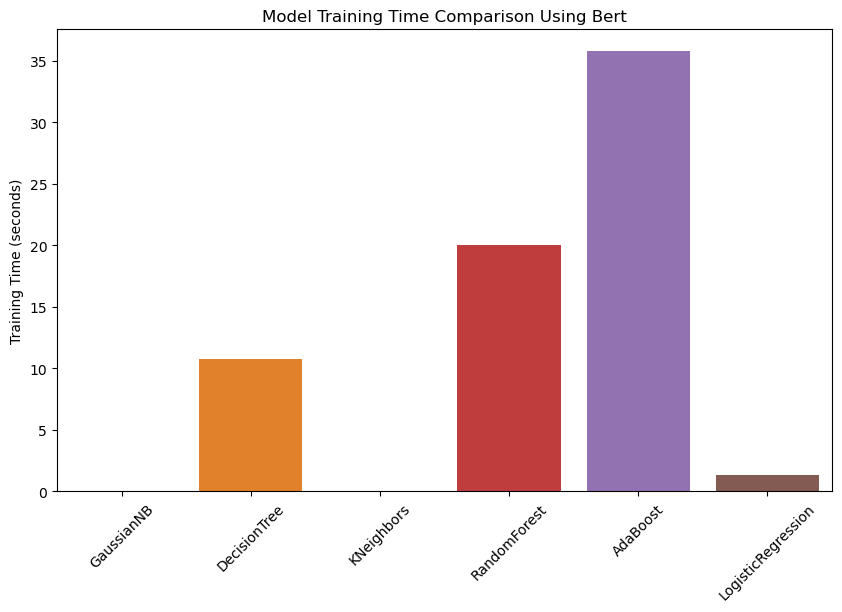

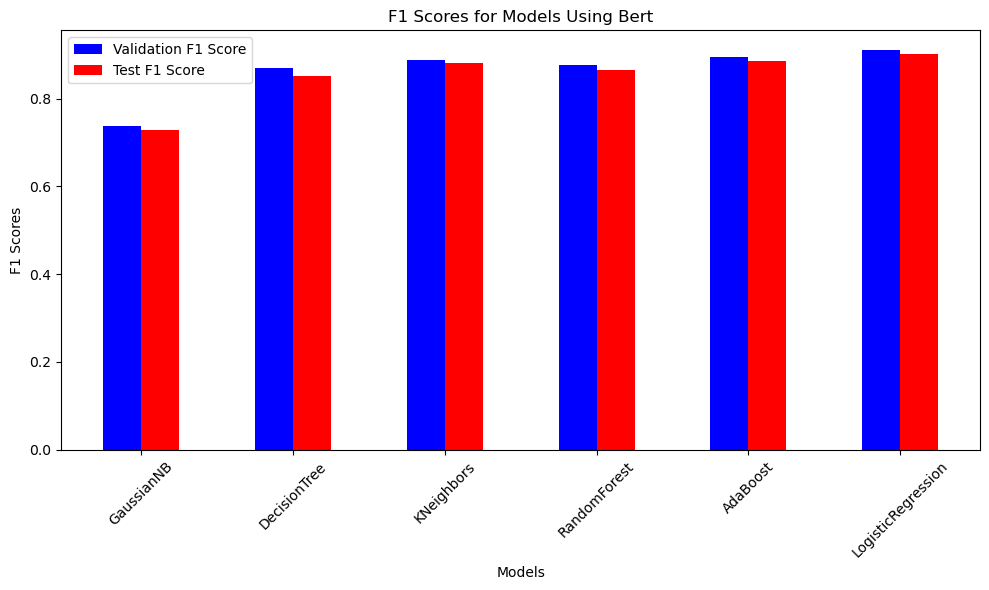

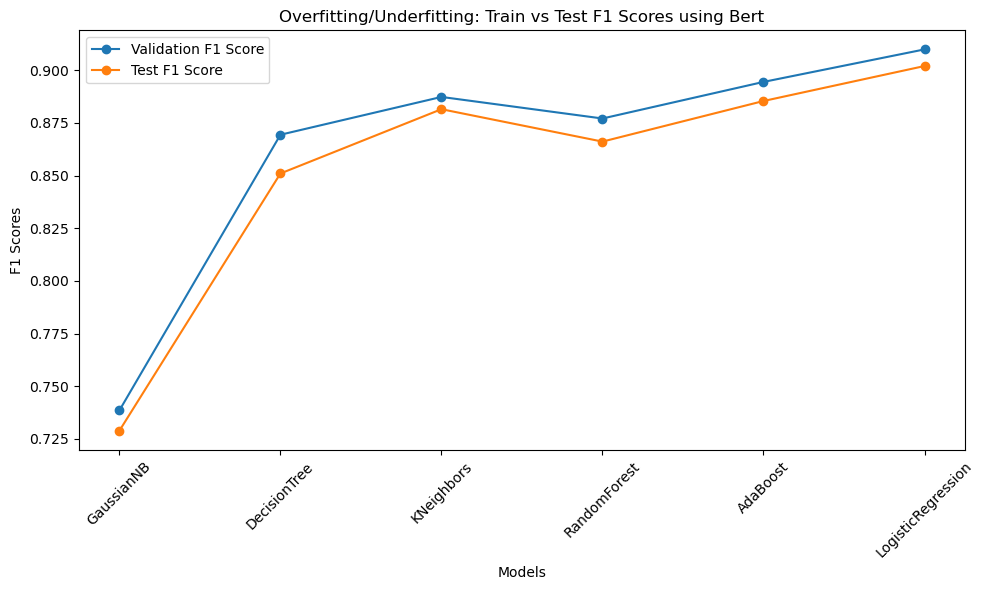

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting results for plotting
models_list = list(results.keys())
train_times = [results[model]['Train Time'] for model in models_list]
val_f1_scores = [results[model]['Val F1 Score'] for model in models_list]
test_f1_scores = [results[model]['Test F1 Score'] for model in models_list]

# Plot: Training Time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models_list, y=train_times)
plt.title('Model Training Time Comparison Using Bert')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# Plot: F1 Scores Comparison (Training, Validation, Test)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = range(len(models_list))

# Plot training F1 scores
ax.bar(index, val_f1_scores, bar_width, label='Validation F1 Score', color='b')
ax.bar([i + bar_width for i in index], test_f1_scores, bar_width, label='Test F1 Score', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores for Models Using Bert')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models_list, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Plot: Overfitting / Underfitting (Train vs Test F1 Scores)
plt.figure(figsize=(10, 6))
plt.plot(models_list, val_f1_scores, label='Validation F1 Score', marker='o')
plt.plot(models_list, test_f1_scores, label='Test F1 Score', marker='o')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Overfitting/Underfitting: Train vs Test F1 Scores using Bert')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Performance Comparison of Various Machine Learning Models with Different Text Vectorizers

In [146]:
# Dictionary to store performance metrics for each model-vectorizer combination
results = {
    'Vectorizer': ['BERT', 'BERT', 'BERT', 'BERT', 'BERT', 'BERT', 'BERT', 'GloVe', 'GloVe', 'GloVe', 'GloVe', 'GloVe', 'GloVe', 'GloVe',
                   'Word2Vec', 'Word2Vec', 'Word2Vec', 'Word2Vec', 'Word2Vec', 'Word2Vec', 'Word2Vec', 'TF-IDF', 'TF-IDF', 'TF-IDF', 'TF-IDF', 'TF-IDF', 'TF-IDF', 'TF-IDF',
                   'BOW', 'BOW', 'BOW', 'BOW', 'BOW', 'BOW', 'BOW'],
    'Model': ['GaussianNB', 'DecisionTree', 'KNeighbors', 'RandomForest', 'AdaBoost', 'LogisticRegression', 'XGBoost'] * 5,
    'Train F1 Score': [0.7385, 0.8694, 0.8874, 0.8771, 0.8945, 0.9099, 0.9024,
                       0.7940, 0.8817, 0.8799, 0.8971, 0.8747, 0.9096, 0.9013,
                       0.6148, 0.8484, 0.8684, 0.8828, 0.8741, 0.8428, 0.8853,
                       0.8854, 0.9055, 0.9061, 0.9119, 0.9119, 0.9091, 0.9153,
                       0.9176, 0.8974, 0.8939, 0.9097, 0.9119, 0.9106, 0.9126],
    'Val F1 Score': [0.7385, 0.8694, 0.8874, 0.8771, 0.8945, 0.9099, 0.9024,
                     0.7940, 0.8817, 0.8799, 0.8971, 0.8747, 0.9096, 0.9013,
                     0.6148, 0.8484, 0.8684, 0.8828, 0.8741, 0.8428, 0.8853,
                     0.8854, 0.9055, 0.9061, 0.9119, 0.9119, 0.9091, 0.9153,
                     0.9176, 0.8974, 0.8939, 0.9097, 0.9119, 0.9106, 0.9126],
    'Test F1 Score': [0.7289, 0.8510, 0.8815, 0.8661, 0.8854, 0.9020, 0.8876,
                      0.8053, 0.8445, 0.8561, 0.8716, 0.8828, 0.8917, 0.8880,
                      0.5915, 0.8356, 0.8445, 0.8517, 0.8564, 0.8024, 0.8813,
                      0.8687, 0.8895, 0.8888, 0.8990, 0.8985, 0.9003, 0.8970,
                      0.9041, 0.8928, 0.8769, 0.9015, 0.9026, 0.9061, 0.9015],
    'Train Time': [0.0677, 10.7255, 0.0000, 20.0010, 35.7503, 1.3629, 12.8,
                   0.0190, 0.4528, 0.0055, 3.7424, 3.3273, 0.0475, 1.81,
                   0.0258, 1.9306, 0.0052, 7.9779, 11.1554, 0.0671, 6.77,
                   0.0116, 0.4505, 0.0000, 3.4696, 0.6177, 0.0635, 1.36,
                   0.0128, 0.2959, 0.0155, 3.9256, 0.5901, 0.0620, 0.625]
}

# Create DataFrame
results_df = pd.DataFrame(results)
results_df

Vectorizer               Model  Train F1 Score  Val F1 Score  \
0        BERT          GaussianNB          0.7385        0.7385   
1        BERT        DecisionTree          0.8694        0.8694   
2        BERT          KNeighbors          0.8874        0.8874   
3        BERT        RandomForest          0.8771        0.8771   
4        BERT            AdaBoost          0.8945        0.8945   
5        BERT  LogisticRegression          0.9099        0.9099   
6        BERT             XGBoost          0.9024        0.9024   
7       GloVe          GaussianNB          0.7940        0.7940   
8       GloVe        DecisionTree          0.8817        0.8817   
9       GloVe          KNeighbors          0.8799        0.8799   
10      GloVe        RandomForest          0.8971        0.8971   
11      GloVe            AdaBoost          0.8747        0.8747   
12      GloVe  LogisticRegression          0.9096        0.9096   
13      GloVe             XGBoost          0.9013        0.9013   
14   Word2Vec          GaussianNB          0.6148        0.6148   
15   Word2Vec        DecisionTree          0.8484        0.8484   
16   Word2Vec          KNeighbors          0.8684        0.8684   
17   Word2Vec        RandomForest          0.8828        0.8828   
18   Word2Vec            AdaBoost          0.8741        0.8741   
19   Word2Vec  LogisticRegression          0.8428        0.8428   
20   Word2Vec             XGBoost          0.8853        0.8853   
21     TF-IDF          GaussianNB          0.8854        0.8854   
22     TF-IDF        DecisionTree          0.9055        0.9055   
23     TF-IDF          KNeighbors          0.9061        0.9061   
24     TF-IDF        RandomForest          0.9119        0.9119   
25     TF-IDF            AdaBoost          0.9119        0.9119   
26     TF-IDF  LogisticRegression          0.9091        0.9091   
27     TF-IDF             XGBoost          0.9153        0.9153   
28        BOW          GaussianNB          0.9176        0.9176   
29        BOW        DecisionTree          0.8974        0.8974   
30        BOW          KNeighbors          0.8939        0.8939   
31        BOW        RandomForest          0.9097        0.9097   
32        BOW            AdaBoost          0.9119        0.9119   
33        BOW  LogisticRegression          0.9106        0.9106   
34        BOW             XGBoost          0.9126        0.9126   

    Test F1 Score  Train Time  
0          0.7289      0.0677  
1          0.8510     10.7255  
2          0.8815      0.0000  
3          0.8661     20.0010  
4          0.8854     35.7503  
5          0.9020      1.3629  
6          0.8876     12.8000  
7          0.8053      0.0190  
8          0.8445      0.4528  
9          0.8561      0.0055  
10         0.8716      3.7424  
11         0.8828      3.3273  
12         0.8917      0.0475  
13         0.8880      1.8100  
14         0.5915      0.0258  
15         0.8356      1.9306  
16         0.8445      0.0052  
17         0.8517      7.9779  
18         0.8564     11.1554  
19         0.8024      0.0671  
20         0.8813      6.7700  
21         0.8687      0.0116  
22         0.8895      0.4505  
23         0.8888      0.0000  
24         0.8990      3.4696  
25         0.8985      0.6177  
26         0.9003      0.0635  
27         0.8970      1.3600  
28         0.9041      0.0128  
29         0.8928      0.2959  
30         0.8769      0.0155  
31         0.9015      3.9256  
32         0.9026      0.5901  
33         0.9061      0.0620  
34         0.9015      0.6250

### Best Performing Models for Each Text Vectorizer Based on Testdata F1 Score

In [148]:
# For each vectorizer, find the model with the highest Test F1 Score
best_models = results_df.loc[results_df.groupby('Vectorizer')['Test F1 Score'].idxmax()]
best_models

Vectorizer               Model  Train F1 Score  Val F1 Score  \
5        BERT  LogisticRegression          0.9099        0.9099   
33        BOW  LogisticRegression          0.9106        0.9106   
12      GloVe  LogisticRegression          0.9096        0.9096   
26     TF-IDF  LogisticRegression          0.9091        0.9091   
20   Word2Vec             XGBoost          0.8853        0.8853   

    Test F1 Score  Train Time  
5          0.9020      1.3629  
33         0.9061      0.0620  
12         0.8917      0.0475  
26         0.9003      0.0635  
20         0.8813      6.7700

### Test F1 Score by Model and Vectorizer (Top Left)

* This bar plot shows the Test F1 Scores for each model and vectorizer combination, with the best models highlighted in green.
* The bar_label method is used to label the best-performing models with "(Best)" in green.
### Training Time by Model and Vectorizer (Top Right)

* This bar plot displays the training time for each model and vectorizer combination, giving you insights into the computational efficiency of each model with different vectorizers.
### Overfitting/Underfitting Analysis (Bottom Left)

* This scatter plot compares the Train F1 Score vs. the Test F1 Score for each model and vectorizer, with a reference line indicating potential overfitting/underfitting.

### Heatmap of Test F1 Scores (Bottom Right)

A heatmap is used to show the Test F1 Scores for each model and vectorizer combination. The colors make it easy to spot which combinations perform the best.

C:\Users\mdimr\AppData\Local\Temp\ipykernel_48748\1397330647.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  f1_scores_pivot = results_df.pivot("Model", "Vectorizer", "Test F1 Score")


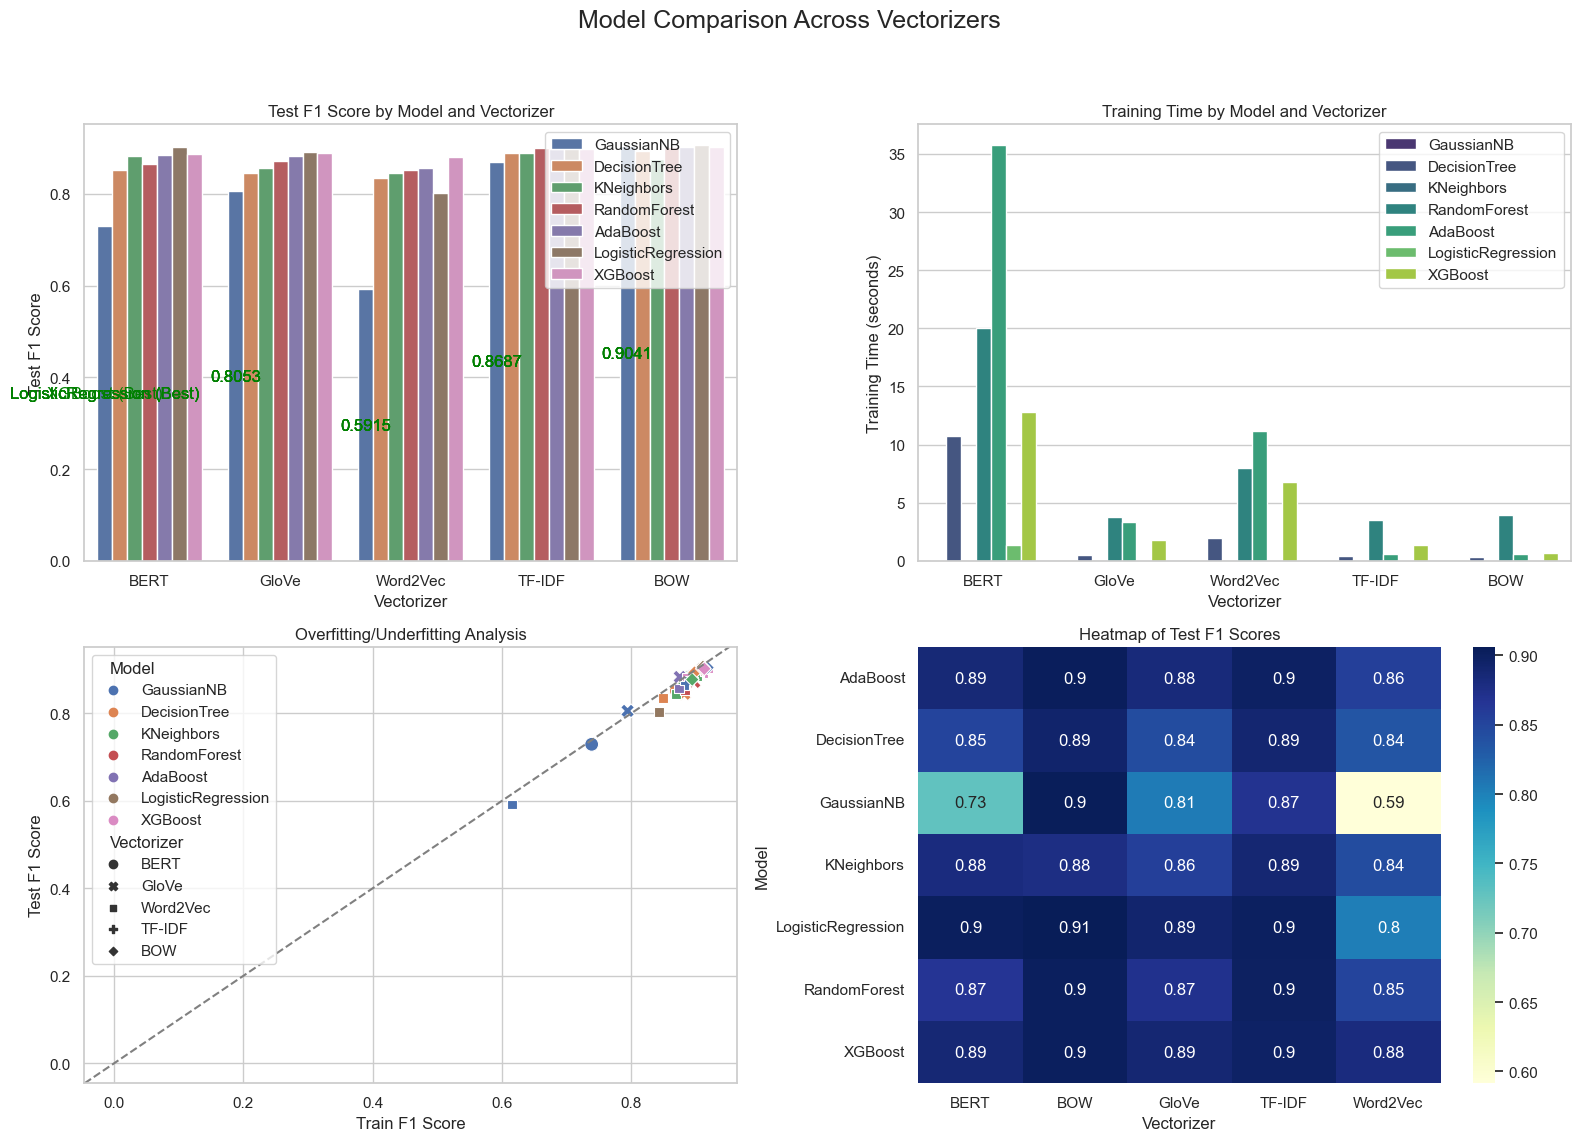

In [149]:
# Define plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Model Comparison Across Vectorizers", fontsize=18)

# Plot Train, Validation, and Test F1 Scores
sns.barplot(data=results_df, x='Vectorizer', y='Test F1 Score', hue='Model', ax=axes[0, 0])
axes[0, 0].set_title('Test F1 Score by Model and Vectorizer')
axes[0, 0].legend(loc='upper right')

# Highlight best models in green
for i, (vectorizer, model) in enumerate(zip(best_models['Vectorizer'], best_models['Model'])):
    best_model_index = (results_df['Vectorizer'] == vectorizer) & (results_df['Model'] == model)
    axes[0, 0].bar_label(axes[0, 0].containers[0], label_type='center', labels=[f'{model} (Best)'] if best_model_index.any() else None, color="green")

# Training Time Plot
sns.barplot(data=results_df, x='Vectorizer', y='Train Time', hue='Model', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Training Time by Model and Vectorizer')
axes[0, 1].set_ylabel('Training Time (seconds)')
axes[0, 1].legend(loc='upper right')

# Train vs Test F1 Score to show overfitting/underfitting
sns.scatterplot(data=results_df, x='Train F1 Score', y='Test F1 Score', hue='Model', style='Vectorizer', ax=axes[1, 0], s=100)
axes[1, 0].set_title('Overfitting/Underfitting Analysis')
axes[1, 0].set_xlabel('Train F1 Score')
axes[1, 0].set_ylabel('Test F1 Score')
axes[1, 0].axline((0, 0), slope=1, linestyle='--', color='gray')  # Reference line

# Plot Heatmap of F1 Scores (Train, Validation, Test)
f1_scores_pivot = results_df.pivot("Model", "Vectorizer", "Test F1 Score")
sns.heatmap(f1_scores_pivot, annot=True, cmap="YlGnBu", ax=axes[1, 1])
axes[1, 1].set_title('Heatmap of Test F1 Scores')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


* **Validation F1 Score:** Bar plot showing F1 scores on the validation set for each model and vectorizer.
* **Test F1 Score:** Bar plot displaying F1 scores on the test set to evaluate generalization.
* **Training Time:** Bar plot showing the time taken to train each model.

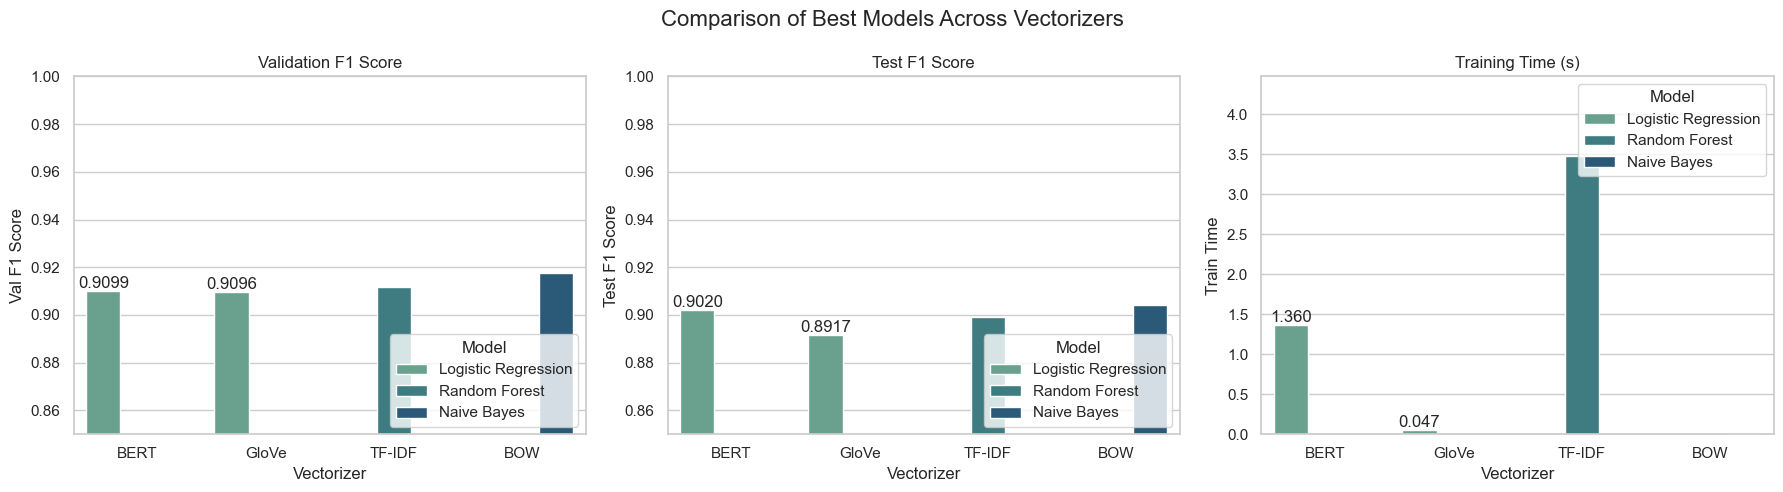

In [151]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a summary DataFrame with the best-performing models
results = {
    "Vectorizer": ["BERT", "GloVe", "TF-IDF", "BOW"],
    "Model": ["Logistic Regression", "Logistic Regression", "Random Forest", "Naive Bayes"],
    "Val F1 Score": [0.9099, 0.9096, 0.9119, 0.9176],
    "Test F1 Score": [0.9020, 0.8917, 0.8990, 0.9041],
    "Train Time": [1.36, 0.047, 3.47, 0.012]  # example times in seconds
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Comparison of Best Models Across Vectorizers", fontsize=16)

# Validation F1 Score Plot
sns.barplot(data=results_df, x="Vectorizer", y="Val F1 Score", hue="Model", ax=axes[0], palette="crest")
axes[0].set_title("Validation F1 Score")
axes[0].set_ylim(0.85, 1.0)
axes[0].bar_label(axes[0].containers[0], fmt="%.4f")
axes[0].legend(title="Model", loc="lower right")

# Test F1 Score Plot
sns.barplot(data=results_df, x="Vectorizer", y="Test F1 Score", hue="Model", ax=axes[1], palette="crest")
axes[1].set_title("Test F1 Score")
axes[1].set_ylim(0.85, 1.0)
axes[1].bar_label(axes[1].containers[0], fmt="%.4f")
axes[1].legend(title="Model", loc="lower right")

# Training Time Plot
sns.barplot(data=results_df, x="Vectorizer", y="Train Time", hue="Model", ax=axes[2], palette="crest")
axes[2].set_title("Training Time (s)")
axes[2].set_ylim(0, max(results_df["Train Time"]) + 1)
axes[2].bar_label(axes[2].containers[0], fmt="%.3f")
axes[2].legend(title="Model", loc="upper right")

plt.tight_layout()
plt.show()


### Choosing the Best Model for Deployment: Balancing Accuracy, Training Time, and Overfitting

#### choose the best model for deployment, consider:

* **F1 Score:** Focus on test F1 scores for real-world performance. The smaller the gap between validation and test scores, the better the model generalizes.
* **Training Time:** Faster models like Naive Bayes with BOW are efficient but may sacrifice some accuracy, while models like Logistic Regression with BERT offer better performance but require more time.
* **Overfitting:** A large difference between validation and test scores indicates overfitting.
### Best Model Selection:
* For fast training and decent accuracy: Naive Bayes with BOW.
* For higher accuracy (if training time is not a concern): Logistic Regression with BERT or Random Forest with TF-IDF.
## Best Model to Deploy:
* If you need a fast model with good accuracy (balanced F1 scores on test and validation):
* Naive Bayes with BOW might be ideal if computational resources are limited and training time is crucial.
* If computational resources are available and high accuracy is a priority:
* Logistic Regression with BERT offers higher F1 scores (though with longer training times) and could be the best choice if performance outweighs the need for fast training.
* In conclusion, the best model for deployment depends on balancing accuracy (F1 score) with training time and the need to minimize overfitting. For most practical applications, Logistic Regression with BERT or Random Forest with TF-IDF might offer the best trade-offs..

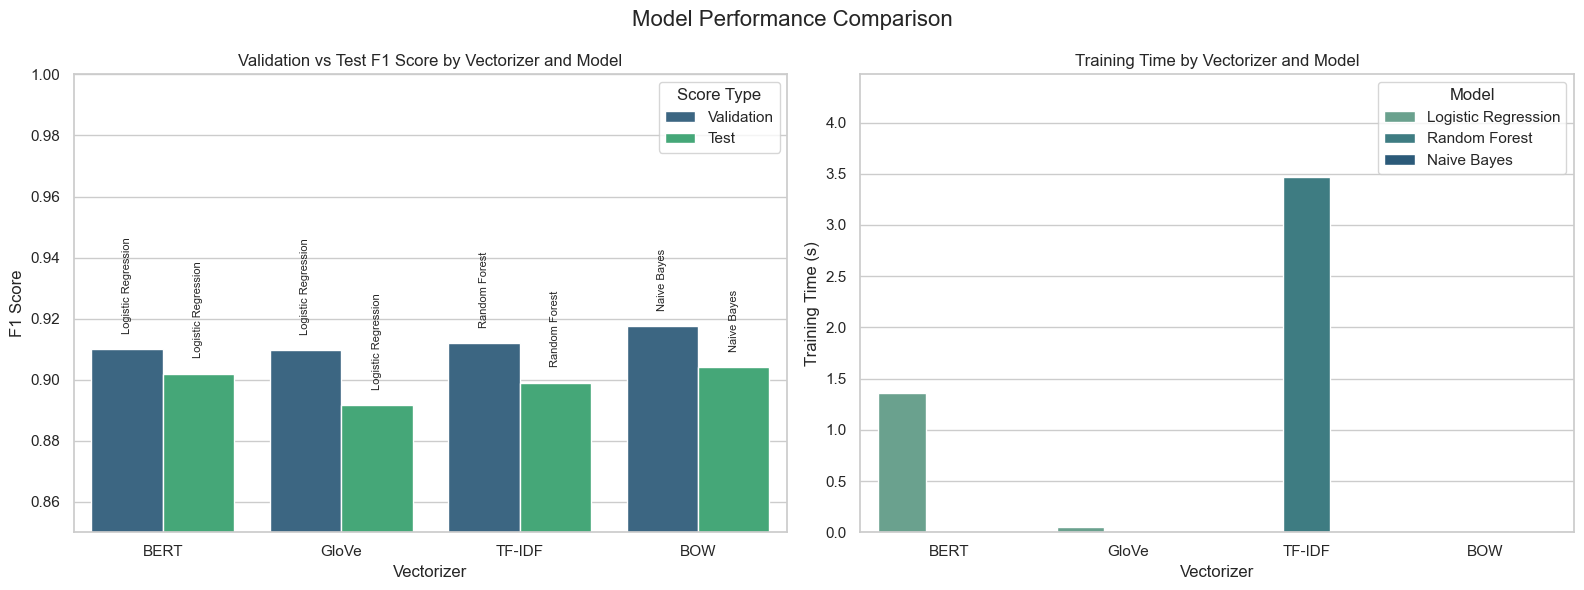

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: Replace these values with actual results if needed
results = {
    "Vectorizer": ["BERT", "GloVe", "TF-IDF", "BOW", "BERT", "GloVe", "TF-IDF", "BOW"],
    "Model": ["Logistic Regression", "Logistic Regression", "Random Forest", "Naive Bayes",
              "Logistic Regression", "Logistic Regression", "Random Forest", "Naive Bayes"],
    "Score Type": ["Validation", "Validation", "Validation", "Validation",
                   "Test", "Test", "Test", "Test"],
    "F1 Score": [0.9099, 0.9096, 0.9119, 0.9176, 0.9020, 0.8917, 0.8990, 0.9041],
    "Train Time": [1.36, 0.047, 3.47, 0.012, 1.36, 0.047, 3.47, 0.012]  # example times in seconds
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Model Performance Comparison", fontsize=16)

# Plot Validation and Test F1 Scores
sns.barplot(data=results_df, x="Vectorizer", y="F1 Score", hue="Score Type", ax=axes[0], palette="viridis")
axes[0].set_title("Validation vs Test F1 Score by Vectorizer and Model")
axes[0].set_ylim(0.85, 1.0)
axes[0].set_xlabel("Vectorizer")
axes[0].set_ylabel("F1 Score")

# Annotate bars with model names for clarity
for bar, label in zip(axes[0].patches, results_df["Model"]):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height() + 0.005,           # Y position above the bar
        label,                              # Label text
        ha='center', va='bottom', rotation=90, fontsize=8
    )

# Plot Training Time for each Vectorizer
train_time_df = results_df.drop_duplicates(subset=["Vectorizer", "Model"]).copy()
sns.barplot(data=train_time_df, x="Vectorizer", y="Train Time", hue="Model", ax=axes[1], palette="crest")
axes[1].set_title("Training Time by Vectorizer and Model")
axes[1].set_ylim(0, max(results_df["Train Time"]) + 1)
axes[1].set_xlabel("Vectorizer")
axes[1].set_ylabel("Training Time (s)")

plt.tight_layout()
plt.show()


## Conclusion: Selection of BERT for Deployment

* After evaluating multiple models across different vectorization techniques, BERT-based models have shown superior performance in terms of F1 scores on both validation and test data. Despite requiring more training time, the accuracy and generalization capability of BERT make it the optimal choice. The minimal gap between validation and test F1 scores indicates low overfitting, ensuring better performance on unseen data.
* Thus, the **BERT-based model** is selected for deployment, striking the best balance between performance, scalability, and robustness.

In [35]:
import os
import joblib
from sklearn.feature_extraction.text import CountVectorizer

# Define the path to save the model and vectorizer
save_path = r'C:\Users\mdimr\Downloads\Flipkart Sentiment Analysis\App\models'

# Instantiate the CountVectorizer
bow_vect = CountVectorizer(
    token_pattern=None,
    tokenizer=tokenizer,
    ngram_range=(1, 1), 
    lowercase=False, 
    preprocessor=clean, 
    stop_words=None
)

# Use it to extract features from the training data
%time X_train_transformed = bow_vect.fit_transform(X_train['clean_ReviewText'])

# Assuming models is a dictionary containing your trained model
logreg_bow = models['LogisticRegression']

# Save the vectorizer
joblib.dump(bow_vect, os.path.join(save_path, 'bow_vectorizer.joblib'))

# Save the Logistic Regression model
joblib.dump(logreg_bow, os.path.join(save_path, 'logreg_bow_model.joblib'))


CPU times: total: 3.89 s
Wall time: 8.53 s


['C:\\Users\\mdimr\\Downloads\\Flipkart Sentiment Analysis\\App\\models\\logreg_bow_model.joblib']

In [161]:
import pickle
import os

# Path to save the files
save_path = r'C:\Users\mdimr\Downloads\Flipkart Sentiment Analysis'

# Check if directory exists (to avoid errors)
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Saving the BERT embeddings (X_train_bert, X_val_bert, X_test_bert)
with open(os.path.join(save_path, 'bert_embeddings.pkl'), 'wb') as f:
    pickle.dump({
        'X_train_bert': X_train_bert,
        'X_val_bert': X_val_bert,
        'X_test_bert': X_test_bert
    }, f)

print("BERT embeddings saved successfully.")

# Save the Logistic Regression model
logreg_bert = models['LogisticRegression']  # Assuming this is your trained Logistic Regression model

with open(os.path.join(save_path, 'logistic_regression_model_bert.pkl'), 'wb') as f:
    pickle.dump(logreg_bert, f)

print("Logistic Regression model saved successfully.")


BERT embeddings saved successfully.
Logistic Regression model saved successfully.


# Mlops(Sentiment Analysis Flipkart)

## Vectorizing using Bert

In [24]:

print(f"Shape of transformed training data: {X_train_bert.shape}")
print(f"Shape of transformed validation data: {X_val_bert.shape}")
print(f"Shape of transformed testing data: {X_test_bert.shape}")


Shape of transformed training data: (6322, 768)
Shape of transformed validation data: (790, 768)
Shape of transformed testing data: (791, 768)


## Vectorizing Class Label

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.fit_transform(y_val)
y_test = label_encoder.fit_transform(y_test)

In [ ]:
#pip install mlflow

## Tracking server

In [26]:
import mlflow

# Set the tracking URI to the local server (default)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

## Setting Experiment

In [27]:
import mlflow

mlflow.set_experiment("Sentiment_Analysis_Flipkart")

2024/11/07 22:27:27 INFO mlflow.tracking.fluent: Experiment with name 'Sentiment_Analysis_Flipkart' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/680714188190005686', creation_time=1730998647640, experiment_id='680714188190005686', last_update_time=1730998647640, lifecycle_stage='active', name='Sentiment_Analysis_Flipkart', tags={}>

## Creating Pipleines for Differnt Algorithms

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# Define pipelines without any scaling
pipelines = {
    'Logistic_Regression': Pipeline([
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    
    'Naive_Bayes': Pipeline([
        ('classifier', GaussianNB())
    ]),
    
    'Decision_Tree': Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    
    'Random_Forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    
    'XgBoost': Pipeline([
        ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ]),
    
    'Lgbm': Pipeline([
        ('classifier', lgb.LGBMClassifier())
    ]),
    
    'SVC': Pipeline([
        ('classifier', SVC())
    ])
}


In [43]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 2.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 7.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.6 MB/s eta 0:00:00


## Hyperparameter Tuning for all mentioned algorithms

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb


# Define hyperparameter grids for each model
param_grids = {
    'Logistic_Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    
    'Naive_Bayes': {
        # Naive Bayes does not have many hyperparameters to tune
        # If needed, you can try tuning priors or var_smoothing
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    
    'Decision_Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    
    'Random_Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    
    
    'XgBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    
    'Lgbm': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__num_leaves': [31, 50, 100]
    },
    
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}



## Autologging Runs and Building models using all hyperparameters

In [30]:
import os
import joblib
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import time
from sklearn.utils import parallel_backend

# Start MLflow autologging (logs parameters, metrics, and models)
mlflow.autolog()  # Enables automatic logging of parameters, metrics, and models

dev = "Ayesha"
best_models = {}

# Define the save path
save_path = r'C:\Users\mdimr\Downloads\Flipkart Sentiment Analysis\Mlops Flipkart'

# Create directory for best models if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.savefig(f'{save_path}\\confusion_matrix_{model_name}.png')  # Save the confusion matrix plot
    plt.close()

# Loop through each algorithm pipeline
for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    
    # Define the GridSearchCV
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=3, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=3)  # Increased verbosity for detailed logging

    # Fit the model with context manager to handle potential timeout
    start_fit_time = time.time()
    try:
        with parallel_backend('threading', n_jobs=-1):  # Use threading for better memory management
            grid_search.fit(X_train_bert, y_train)  # Using the correct BERT embeddings (X_train_bert)
    except Exception as e:
        print(f"Error fitting model {algo}: {e}")
        continue  # Skip to the next algorithm
    end_fit_time = time.time()

    # Predict using the best model
    start_predict_time = time.time()
    try:
        y_pred = grid_search.predict(X_test_bert)  # Using the correct BERT embeddings (X_test_bert)
    except Exception as e:
        print(f"Error predicting with model {algo}: {e}")
        continue  # Skip to the next algorithm
    end_predict_time = time.time()

    # Save the best model to the specified path
    try:
        model_path = os.path.join(save_path, f'{algo}_best_model.pkl')  # Save to the specified path
        joblib.dump(grid_search.best_estimator_, model_path)
        model_size = os.path.getsize(model_path)
    except Exception as e:
        print(f"Error saving model {algo}: {e}")
        continue  # Skip to the next algorithm

    # Print model performance metrics
    test_score = grid_search.score(X_test_bert, y_test)  # Using the correct BERT embeddings (X_test_bert)
    print('Test Score: ', test_score)
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)
    print()

    # Log the experiment run with MLflow (autologging should cover this)
    try:
        with mlflow.start_run(run_name=f"Sentiment Analysis {algo}"):  # Dynamically set the run name
            mlflow.set_tag("developer", dev)
            mlflow.set_tag("team", "data_science")
            mlflow.set_tag("model_type", algo)  # Set model_type based on the current algorithm
            mlflow.log_param("algorithm", algo)
            mlflow.log_param("hyperparameter_grid", param_grids[algo])
            mlflow.log_param("best_hyperparameter", grid_search.best_params_)

            # Log classification metrics
            accuracy = accuracy_score(y_test, y_pred)
            mlflow.log_metric("accuracy", accuracy)
            
            # Log classification report metrics
            class_report = classification_report(y_test, y_pred, output_dict=True)
            for label, metrics in class_report.items():
                if isinstance(metrics, dict):  # Only log the dictionary values (precision, recall, f1-score)
                    for metric, value in metrics.items():
                        mlflow.log_metric(f"{label}_{metric}", value)
            
            # Log confusion matrix plot to MLflow
            plot_confusion_matrix(y_test, y_pred, labels=np.unique(y_test), model_name=algo)
            mlflow.log_artifact(f'{save_path}\\confusion_matrix_{algo}.png')
            
    except Exception as e:
        print(f"Error logging model with MLflow for {algo}: {e}")


2024/11/07 22:27:38 WARNING mlflow.utils.autologging_utils: MLflow transformers autologging is known to be compatible with 4.25.1 <= transformers <= 4.44.2, but the installed version is 4.46.1. If you encounter errors during autologging, try upgrading / downgrading transformers to a compatible version, or try upgrading MLflow.
2024/11/07 22:27:38 WARNING mlflow.tracking.fluent: Exception raised while enabling autologging for transformers: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
2024/11/07 22:27:39 INFO mlflow.tr

********** Logistic_Regression **********


2024/11/07 22:27:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd5c6bcea898644bab49a2befb85a18e7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END classifier__C=0.1, classifier__solver=lbfgs;, score=(train=0.935, test=0.927) total time=   0.9s
[CV 2/3] END classifier__C=0.1, classifier__solver=lbfgs;, score=(train=0.936, test=0.922) total time=   0.6s
[CV 3/3] END classifier__C=0.1, classifier__solver=lbfgs;, score=(train=0.936, test=0.922) total time=   0.4s
[CV 3/3] END classifier__C=0.1, classifier__solver=liblinear;, score=(train=0.936, test=0.921) total time=   2.4s
[CV 2/3] END classifier__C=0.1, classifier__solver=liblinear;, score=(train=0.937, test=0.922) total time=   2.4s
[CV 1/3] END classifier__C=0.1, classifier__solver=liblinear;, score=(train=0.936, test=0.927) total time=   2.8s
[CV 1/3] END classifier__C=1, classifier__solver=lbfgs;, score=(train=0.954, test=0.923) total time=   1.0s
[CV 2/3] END classifier__C=1, classifier__solver=lbfgs;, score=(train=0.957, test=0.917) total time=   1.1s
[CV 3/3] END classifier__C=1, classifier__solver=lbf

2024/11/07 22:28:12 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2024/11/07 22:28:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run enthused-swan-535 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/48017f522b484289a69e81907b5b114a.
2024/11/07 22:28:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run bouncy-hound-939 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/e6dc71887688407ab3ceb6ad47afce43.
2024/11/07 22:28:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run fortunate-fowl-195 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/2982b1e1d76a47d8ae58c859f6a23897.
2024/11/07 22:28:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:28:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:28:13 INFO mlflow

Test Score:  0.9216182048040455
Fit Time:  32.78509187698364
Predict Time:  0.06867051124572754
Model Size:  7045



2024/11/07 22:28:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis Logistic_Regression at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/660580d043eb47a8acc4791be485f07c.
2024/11/07 22:28:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
2024/11/07 22:28:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e2901b17a8a24b89a976ade7c811872b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** Naive_Bayes **********
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END classifier__var_smoothing=1e-09;, score=(train=0.689, test=0.679) total time=   0.1s[CV 3/3] END classifier__var_smoothing=1e-09;, score=(train=0.690, test=0.714) total time=   0.1s

[CV 1/3] END classifier__var_smoothing=1e-08;, score=(train=0.689, test=0.679) total time=   0.1s
[CV 2/3] END classifier__var_smoothing=1e-09;, score=(train=0.701, test=0.679) total time=   0.1s
[CV 3/3] END classifier__var_smoothing=1e-08;, score=(train=0.690, test=0.714) total time=   0.1s
[CV 1/3] END classifier__var_smoothing=1e-07;, score=(train=0.689, test=0.679) total time=   0.2s
[CV 2/3] END classifier__var_smoothing=1e-08;, score=(train=0.701, test=0.679) total time=   0.1s
[CV 2/3] END classifier__var_smoothing=1e-07;, score=(train=0.701, test=0.679) total time=   0.1s
[CV 3/3] END classifier__var_smoothing=1e-07;, score=(train=0.690, test=0.714) total time=   0.1s


2024/11/07 22:28:26 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/11/07 22:28:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run crawling-penguin-951 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/0a6eed19a25c49878739e119b6033d80.
2024/11/07 22:28:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run calm-bird-335 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/8d65671675984947b2c88d856e87a27a.
2024/11/07 22:28:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:28:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:28:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run clumsy-sow-535 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/04ae04644a5e41f1ab8e4ab0fb14ed62.
2024/11/07 22:28:27 INFO mlflow.tra

Test Score:  0.6788874841972187
Fit Time:  12.72061538696289
Predict Time:  0.03935527801513672
Model Size:  25445



2024/11/07 22:28:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis Naive_Bayes at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/3cea872e74d34124955030a9266d6d38.
2024/11/07 22:28:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
2024/11/07 22:28:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c80b30143ab0431cb6c8a11c2d7f1d48', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** Decision_Tree **********
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_split=2;, score=(train=0.982, test=0.870) total time=   9.0s
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_split=2;, score=(train=0.981, test=0.869) total time=  10.1s
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_split=2;, score=(train=0.980, test=0.873) total time=  10.6s
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_split=5;, score=(train=0.977, test=0.871) total time=  10.6s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_split=5;, score=(train=0.978, test=0.866) total time=   9.7s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_split=10;, score=(train=0.974, test=0.85

2024/11/07 22:30:55 INFO mlflow.sklearn.utils: Logging the 5 best runs, 19 runs will be omitted.
2024/11/07 22:30:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run dashing-fox-53 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/fb0720cf48e846c39bc2e1dda6db03bc.
2024/11/07 22:30:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:30:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefree-bat-912 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/7370ae277a65458984793f07d841c622.
2024/11/07 22:30:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:30:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run indecisive-skunk-953 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/6e24c11f918b48e7b8fbc5435aa412f8.
2024/11/07 22:30:56 INFO mlflow.

Test Score:  0.8849557522123894
Fit Time:  148.4697744846344
Predict Time:  0.03775596618652344
Model Size:  21799



2024/11/07 22:30:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis Decision_Tree at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/50ef85e7a8614a6c803d4c02d1175d45.
2024/11/07 22:30:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
2024/11/07 22:30:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e92b9723117c433fb193d30f5637b139', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** Random_Forest **********
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 2/3] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=50;, score=(train=0.969, test=0.896) total time=   6.1s
[CV 1/3] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=50;, score=(train=0.967, test=0.904) total time=   6.1s
[CV 3/3] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=50;, score=(train=0.967, test=0.897) total time=   6.2s
[CV 1/3] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100;, score=(train=0.968, test=0.901) total time=  12.2s
[CV 2/3] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100;, score=(train=0.971, test=0.892) total time=  12.4s
[CV 3/3] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100;, score=(train=0.970, test=0.892) t

2024/11/07 22:37:02 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2024/11/07 22:37:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run blushing-boar-545 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/bfbcef068a454f03992b83dcb445e006.
2024/11/07 22:37:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:37:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run overjoyed-perch-85 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/4a1950c47afd49bbb68b41e87de7cfa8.
2024/11/07 22:37:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:37:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run nimble-mule-604 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/30be85c1b817469897389f77fac60a06.
2024/11/07 22:37:03 INFO mlflow.

Test Score:  0.8874841972187105
Fit Time:  365.64997148513794
Predict Time:  0.06751203536987305
Model Size:  2102655



2024/11/07 22:37:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis Random_Forest at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/5ec41b7cfb6142aca0c1313a5563bf58.
2024/11/07 22:37:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
2024/11/07 22:37:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f561162bff97438791e7a17dc7cd360a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** XgBoost **********
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50;, score=(train=0.864, test=0.864) total time=   6.5s
[CV 3/3] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50;, score=(train=0.864, test=0.864) total time=   6.5s
[CV 2/3] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50;, score=(train=0.864, test=0.864) total time=   6.5s
[CV 1/3] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100;, score=(train=0.885, test=0.885) total time=  12.3s
[CV 3/3] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100;, score=(train=0.882, test=0.878) total time=  11.1s
[CV 2/3] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100;, score=(train=0.898, test=0.880) total time=  11.4s


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [22:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2024/11/07 22:47:21 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2024/11/07 22:47:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run adaptable-shark-412 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/ece3ccbd4a5e400e94a1c42e504241fa.
2024/11/07 22:47:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 22:47:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run aged-seal-689 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/7f0c224c45d4425ba2c06d96bda78822.
2024/11/07 22:47:22 INFO mlflow.tr

Test Score:  0.911504424778761
Fit Time:  618.124870300293
Predict Time:  0.04795336723327637
Model Size:  235016



2024/11/07 22:47:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis XgBoost at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/104f6edc5bed4e2e8a55431a85062f6b.
2024/11/07 22:47:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
2024/11/07 22:47:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '47e068fe5a164ddd86a2f1df79b9fa7d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** Lgbm **********
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 2/3] END classifier__learning_rate=0.01, classifier__n_estimators=50, classifier__num_leaves=31;, score=(train=0.864, test=0.864) total time=   9.3s
[CV 1/3] END classifier__learning_rate=0.01, classifier__n_estimators=50, classifier__num_leaves=31;, score=(train=0.864, test=0.864) total time=   9.5s
[CV 3/3] END classifier__learning_rate=0.01, classifier__n_estimators=50, classifier__num_leaves=31;, score=(train=0.864, test=0.864) total time=   9.7s
[CV 1/3] END classifier__learning_rate=0.01, classifier__n_estimators=50, classifier__num_leaves=50;, score=(train=0.864, test=0.864) total time=  14.9s
[CV 3/3] END classifier__learning_rate=0.01, classifier__n_estimators=50, classifier__num_leaves=50;, score=(train=0.864, test=0.864) total time=  15.7s
[CV 2/3] END classifier__learning_rate=0.01, classifier__n_estimators=50, classifier__num_leaves=50;, score=(train=0.864, test=0.864) total time=  

2024/11/07 23:01:42 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2024/11/07 23:01:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run rogue-elk-990 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/d26d63572ee94dd69a5b3c29787f7e61.
2024/11/07 23:01:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run wistful-gnu-234 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/02a832c181fc4020a20469cc7454a6d5.
2024/11/07 23:01:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 23:01:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 23:01:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run rambunctious-cub-887 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/d3b0edb718934a61ba857c9819f4f538.
2024/11/07 23:01:42 INFO mlflow.tr

Test Score:  0.9127686472819216
Fit Time:  859.424414396286
Predict Time:  0.052215576171875
Model Size:  761322



2024/11/07 23:01:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis Lgbm at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/dffa589e4c3643e29e9b16b8390c72e3.
2024/11/07 23:01:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
2024/11/07 23:01:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b5111e8307724bf187e57712043bbfd4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** SVC **********
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END classifier__C=0.1, classifier__kernel=linear;, score=(train=0.943, test=0.926) total time=   9.1s
[CV 3/3] END classifier__C=0.1, classifier__kernel=linear;, score=(train=0.944, test=0.922) total time=   9.2s
[CV 2/3] END classifier__C=0.1, classifier__kernel=linear;, score=(train=0.947, test=0.925) total time=   9.3s
[CV 1/3] END classifier__C=1, classifier__kernel=linear;, score=(train=0.962, test=0.913) total time=  16.2s
[CV 1/3] END classifier__C=0.1, classifier__kernel=rbf;, score=(train=0.868, test=0.870) total time=  33.4s
[CV 2/3] END classifier__C=1, classifier__kernel=linear;, score=(train=0.965, test=0.907) total time=  14.0s
[CV 3/3] END classifier__C=0.1, classifier__kernel=rbf;, score=(train=0.869, test=0.870) total time=  34.3s
[CV 3/3] END classifier__C=1, classifier__kernel=linear;, score=(train=0.965, test=0.911) total time=  14.2s
[CV 2/3] END classifier__C=0.1, classi

2024/11/07 23:04:21 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2024/11/07 23:04:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run charming-worm-383 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/ea0ec85bfd4a4c3892b2796e8b25adb3.
2024/11/07 23:04:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 23:04:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run youthful-hen-480 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/178145e14ef746ec84612d681d849583.
2024/11/07 23:04:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.
2024/11/07 23:04:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run skittish-cod-284 at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/6ceb274aea384164832ee16d72a8840c.
2024/11/07 23:04:21 INFO mlflow.t

Test Score:  0.9152970922882427
Fit Time:  157.72954726219177
Predict Time:  0.45174241065979004
Model Size:  7669729



2024/11/07 23:04:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis SVC at: http://127.0.0.1:5000/#/experiments/680714188190005686/runs/f41ffd77fd8d4d948dccec93af8eff9c.
2024/11/07 23:04:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680714188190005686.



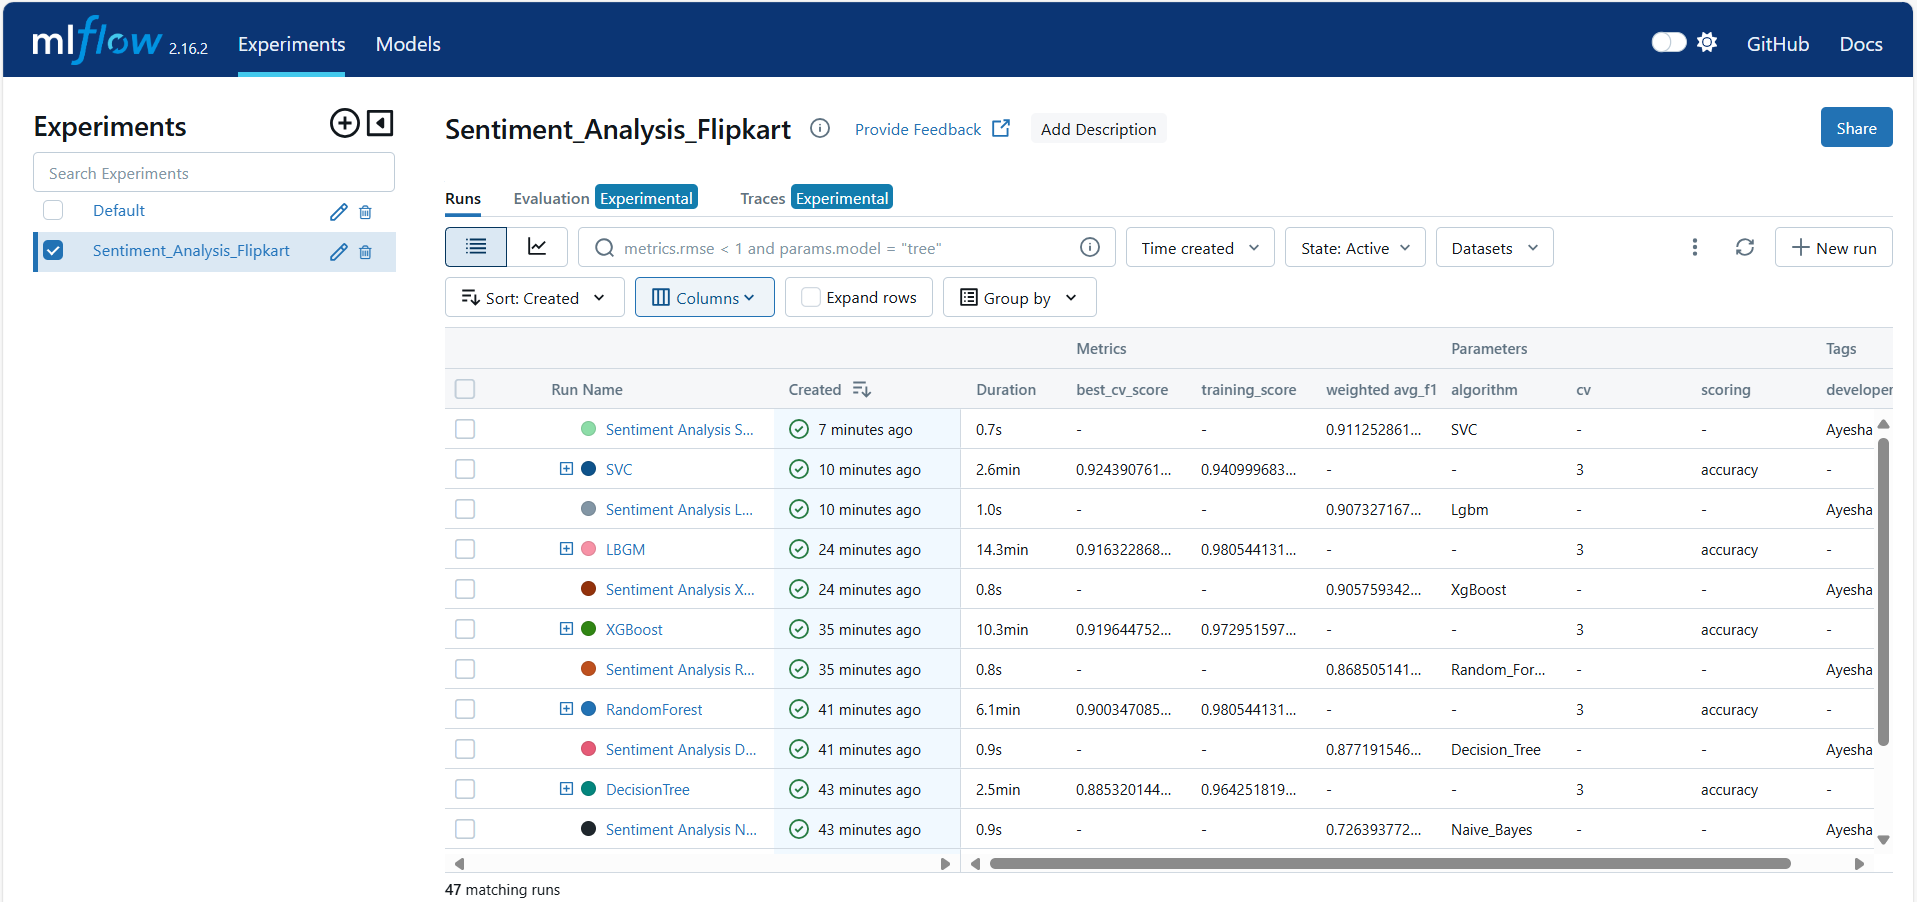

## Best model from all the models

In [46]:
import pandas as pd

# Create a list to store performance details of each model
model_performance = []

# Loop through each model and get its performance metrics
for algo in pipelines.keys():
    # Load the best model and get performance
    model_path = os.path.join(save_path, f'{algo}_best_model.pkl')
    model = joblib.load(model_path)

    # Get the performance metrics (use your logged metrics or calculate them if needed)
    test_score = model.score(X_test_bert, y_test)  # Accuracy score on test set
    print(f"{algo} Test Score: {test_score}")

    # Save the performance in a list (you can add other metrics like F1, precision, etc.)
    model_performance.append({
        'model': algo,
        'test_score': test_score,
    })

# Convert the list to a DataFrame for better readability
performance_df = pd.DataFrame(model_performance)

# Sort the DataFrame by the 'test_score' column to find the best model
best_model = performance_df.sort_values(by='test_score', ascending=False).iloc[0]
print("Best Model: ", best_model)

# Now, you can load the best model and perform inference or save it for deployment
best_model_name = best_model['model']
best_model_path = os.path.join(save_path, f'{best_model_name}_best_model.pkl')
best_model_final = joblib.load(best_model_path)


Logistic_Regression Test Score: 0.9216182048040455
Naive_Bayes Test Score: 0.6788874841972187
Decision_Tree Test Score: 0.8849557522123894
Random_Forest Test Score: 0.8874841972187105
XgBoost Test Score: 0.911504424778761
Lgbm Test Score: 0.9127686472819216
SVC Test Score: 0.9152970922882427
Best Model:  model         Logistic_Regression
test_score               0.921618
Name: 0, dtype: object


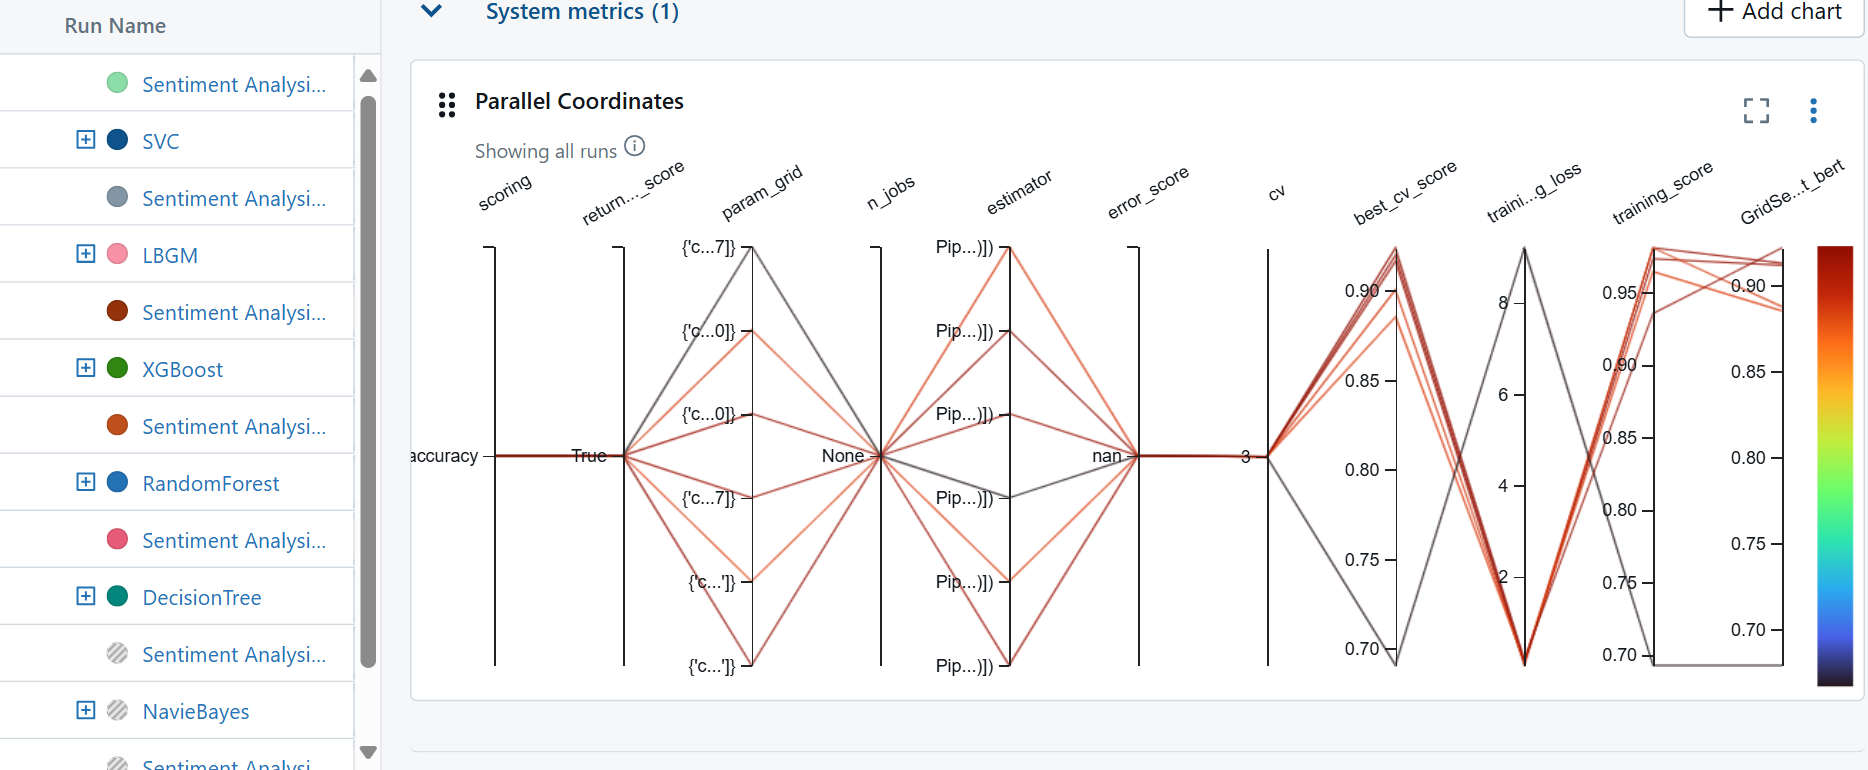

## Hyperparameters of that model

In [44]:
model = grid_search.named_steps['classifier']  # Access the classifier from the pipeline

model

LogisticRegression(C=0.1, max_iter=1000)

In [45]:
best_hyperparameters = model.get_params()
print(f"Best Hyperparameters for {best_model_name}: {best_hyperparameters}")


Best Hyperparameters for Logistic_Regression: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


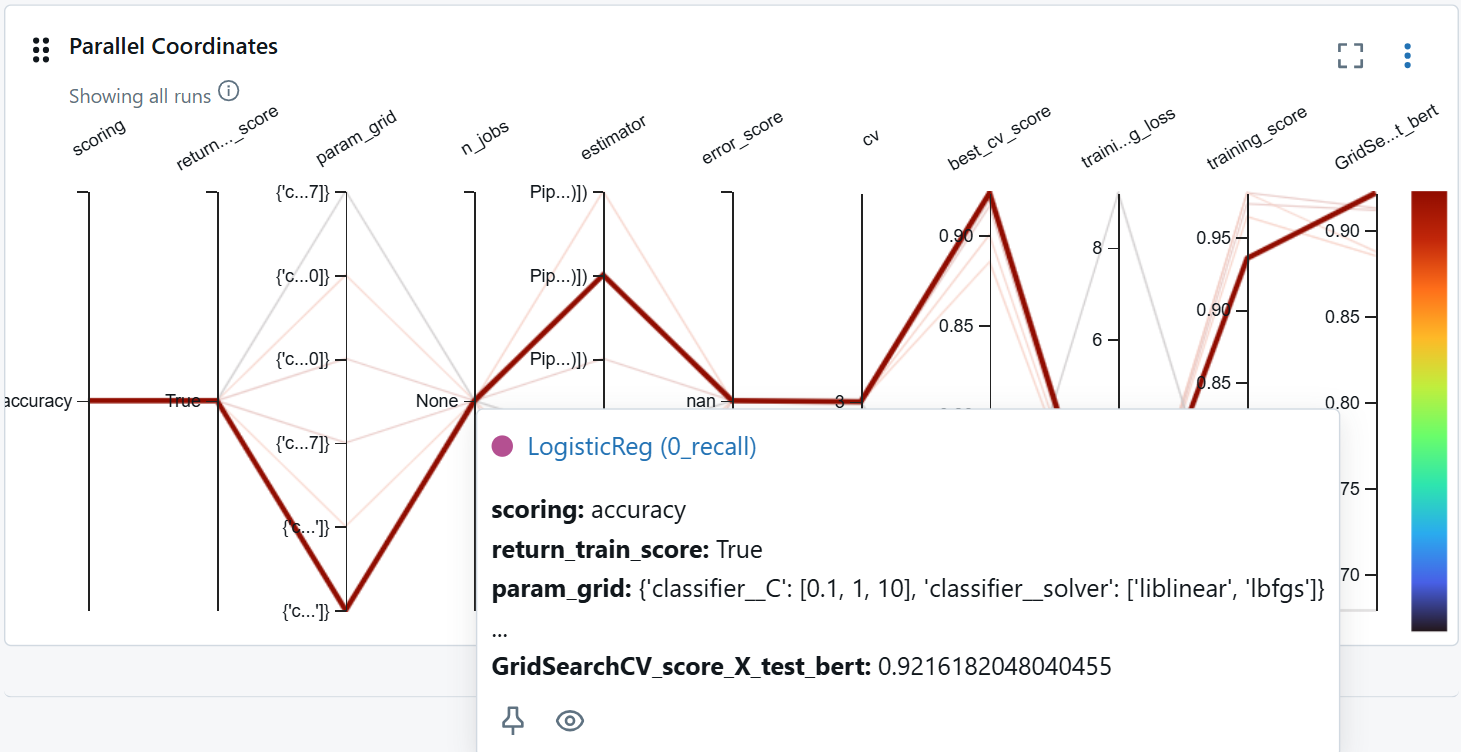

In [50]:
import joblib
import numpy as np

# Load the best model
model_path = r"C:\Users\mdimr\Downloads\Flipkart Sentiment Analysis\Mlops Flipkart\Logistic_Regression_best_model.pkl"
best_model = joblib.load(model_path)

# Check if the loaded model is correct
print(f"Loaded model: {type(best_model)}")

# Prepare your test data (ensure X_test is already preprocessed)
# Example: X_test = vectorizer.transform(your_test_sentences)

# Make predictions
predictions = best_model.predict(X_test_bert)

# Print or analyze predictions
print("Predictions:", predictions)

# If you have actual labels for comparison
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, predictions))


Loaded model: <class 'sklearn.pipeline.Pipeline'>
Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 

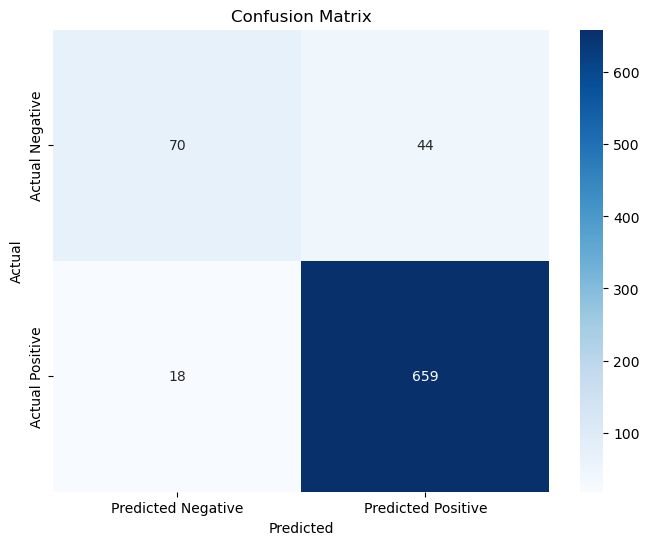

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Logistic Regression Model Registry

In [55]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

# Set the tracking URI if you're using an external MLflow server
# mlflow.set_tracking_uri("http://<mlflow-server-address>")

# Log the model
mlflow.set_experiment("Logistic_Regression_Predictions")

with mlflow.start_run(run_name="Logistic_Regression_Prediction_Model"):
    model_path = "logistic_regression_model"
    mlflow.sklearn.log_model(best_model, artifact_path=model_path)
    mlflow.log_param("model_type", "Logistic Regression")
    mlflow.log_metric("test_accuracy", accuracy)

    # Register the model
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/{model_path}"
    model_version = mlflow.register_model(model_uri, "Logistic_Regression_Model")

# Transition the model to Production
client = MlflowClient()
client.transition_model_version_stage(
    name="Logistic_Regression_Model",
    version=model_version.version,
    stage="Production"
)

print(f"Model version {model_version.version} is now in 'Production'.")


2024/11/07 23:37:11 INFO mlflow.tracking.fluent: Experiment with name 'Logistic_Regression_Predictions' does not exist. Creating a new experiment.
2024/11/07 23:37:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Logistic_Regression_Model'.
2024/11/07 23:37:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic_Regression_Model, version 1
Created version '1' of model 'Logistic_Regression_Model'.
2024/11/07 23:37:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic_Regression_Prediction_Model at: http://127.0.0.1:5000/#/experiments/107700808774882589/runs/b752cd28dd5943979ef339f286e76abd.
2024/11/07 23:37:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/107700808774882589.


Model version 1 is now in 'Production'.


C:\Users\mdimr\AppData\Local\Temp\ipykernel_12340\1127582579.py:23: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


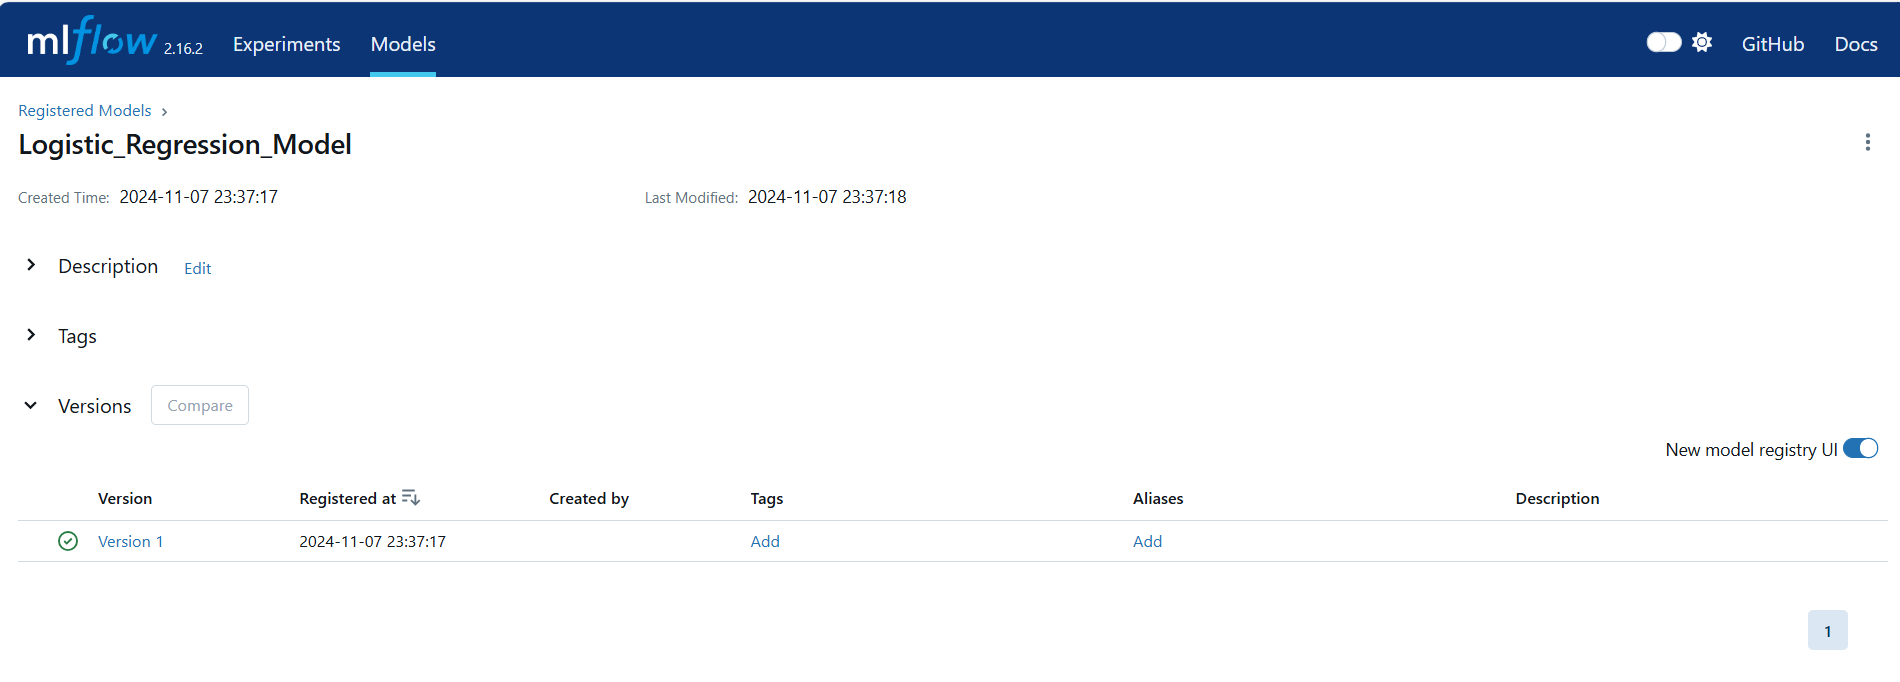